# Dataset 4 : Aviation Accident Database

Dataset from Kaggle : **"Aviation Accidents and Incidents"** by *NTSB, FAA and WAAS*  
Source: https://www.kaggle.com/khsamaha/aviation-accident-database-synopses (requires login)

## Data Acquisition

The NTSB aviation accident database contains information from 1962 and later about civil aviation accidents and selected incidents within the United States, its territories and possessions, and in international waters



## Pre-requisite

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from statistics import mean

sb.set()
pd.set_option('display.max_columns', None)

In [3]:
#Import Aviation Data csv file into variable, df
#Encoding argument used, otherwise will have error
df = pd.read_csv("AviationData.csv", encoding='ISO-8859-1',low_memory=False)

In [18]:
#At a glance, 31 columns, 87282 rows
print(df.shape)

(87282, 31)


In [19]:
#5 Numerical Dtypes, 26 Categorical Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87282 entries, 0 to 87281
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                87282 non-null  object 
 1   Investigation.Type      87282 non-null  object 
 2   Accident.Number         87282 non-null  object 
 3   Event.Date              87282 non-null  object 
 4   Location                87230 non-null  object 
 5   Country                 87056 non-null  object 
 6   Latitude                33073 non-null  object 
 7   Longitude               33064 non-null  object 
 8   Airport.Code            49322 non-null  object 
 9   Airport.Name            51955 non-null  object 
 10  Injury.Severity         86399 non-null  object 
 11  Aircraft.damage         84272 non-null  object 
 12  Aircraft.Category       30783 non-null  object 
 13  Registration.Number     85965 non-null  object 
 14  Make                    87219 non-null

In [20]:
#Describe numerical columns
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,81533.000000,75881.000000,74772.000000,75349.000000,81370.000000
mean,1.147131,0.652772,0.280921,0.360814,5.311847
std,0.447085,5.521338,1.557476,2.257721,27.899156
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [21]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


---
# Data Preparation

In order for us to achieve high accuracy, readibility and comprehensiveness, the imported data set will be prepared. The raw data is commonly filled with missing values, inaccuracies, non-required or other errors which will be eliminated in this process


### Removal of columns with >50% missing values 

In [22]:
# Find columns missing more than 50% of values.

gt50 = []

for x in df.columns:
    eqn = (df[x].isnull().sum())/(df[x].size)
    print(f"{x}: [{(eqn*100).round(2)}]")
    if eqn > 0.50:
        gt50.append(x)

#Number of columns with >50% missing values
print(f"\ncolumns with >50% values: {gt50}")

Event.Id: [0.0]
Investigation.Type: [0.0]
Accident.Number: [0.0]
Event.Date: [0.0]
Location: [0.06]
Country: [0.26]
Latitude: [62.11]
Longitude: [62.12]
Airport.Code: [43.49]
Airport.Name: [40.47]
Injury.Severity: [1.01]
Aircraft.damage: [3.45]
Aircraft.Category: [64.73]
Registration.Number: [1.51]
Make: [0.07]
Model: [0.11]
Amateur.Built: [0.12]
Number.of.Engines: [6.59]
Engine.Type: [6.75]
FAR.Description: [65.1]
Schedule: [85.87]
Purpose.of.flight: [6.63]
Air.carrier: [81.7]
Total.Fatal.Injuries: [13.06]
Total.Serious.Injuries: [14.33]
Total.Minor.Injuries: [13.67]
Total.Uninjured: [6.77]
Weather.Condition: [4.56]
Broad.phase.of.flight: [29.28]
Report.Status: [5.97]
Publication.Date: [15.64]

columns with >50% values: ['Latitude', 'Longitude', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier']


In [23]:
# Aircraft.Cateogory is excluded
gt50.remove("Aircraft.Category") 

df1 = df.drop(gt50, axis=1)
print(df1.shape)
df1.head(10)

(87282, 26)


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,NaN,NaN,Non-Fatal,Substantial,Airplane,CF-TLU,Mcdonnell Douglas,DC9,No,2.0,Turbo Fan,NaN,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,Fatal(4),Destroyed,NaN,N4988E,Cessna,180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,NaN,N3906K,North American,NAVION L-17B,No,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


#### Total of 5 columns dropped, excluding Aircraft.Category

### Column: Investigation.Type

In [24]:
#Remove rows that are Incidents and not Accidents
df1 = df1[df1['Investigation.Type'] == "Accident"]

print(df1.shape)
print(f"{len(df) - len(df1)} rows dropped")

(83536, 26)
3746 rows dropped


### Column: Event.Date

In [25]:
# Convert Date to a datetime, add a Year & Month column and remove data before 1982
df1['Event.Date'] = pd.to_datetime(df1['Event.Date'])

# Add a day, month & year column
df1['Year'] = df1['Event.Date'].dt.year
df1['Month'] = df1['Event.Date'].dt.month_name().str[:3]
df1['Day'] = df1['Event.Date'].dt.day_name().str[:3]
year_df = df1[['Year', 'Event.Id']]
# Add a weekend column
df1.loc[(df1['Day'] == 'Sat') | (df1['Day'] == 'Sun'), 'Weekend'] = True
df1.loc[(df1['Day'] != 'Sat') & (df1['Day'] != 'Sun'), 'Weekend'] = False

print(df1.shape)

# Added 4 columns, Year, Month, Day. and Weekend(Boolean)
df1.head(10)

# Remove data from before 1982
df1 = df1[df1['Year'] >= 1982]
year_df = year_df[year_df['Year'] >= 1982]
df1.info()


(83536, 30)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 83529 entries, 7 to 87281
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                83529 non-null  object        
 1   Investigation.Type      83529 non-null  object        
 2   Accident.Number         83529 non-null  object        
 3   Event.Date              83529 non-null  datetime64[ns]
 4   Location                83489 non-null  object        
 5   Country                 83323 non-null  object        
 6   Airport.Code            47398 non-null  object        
 7   Airport.Name            49951 non-null  object        
 8   Injury.Severity         83251 non-null  object        
 9   Aircraft.damage         82161 non-null  object        
 10  Aircraft.Category       29122 non-null  object        
 11  Registration.Number     82487 non-null  object        
 12  Make                    83493 non-

#### Convert Date to a datetime
#### Added 4 columns, Year, Month, Day. and Weekend
#### Remove data from before 1982

### Investigate Null / NaN / NA values

In [26]:
# Start to investigate null/NaN/NA values
missing_values = []

for x in df1.columns:
    eqn = (df1[x].isnull().sum())/(df1[x].size)
    if eqn > 0:
        missing_values.append([x, (eqn*100).round(10)])
mv_df = pd.DataFrame(missing_values, columns=["Column", "Percentage-Missing"])
mv_df.head(30)

,Column,Percentage-Missing
0,Location,0.047888
1,Country,0.246621
2,Airport.Code,43.255636
3,Airport.Name,40.199212
4,Injury.Severity,0.332819
5,Aircraft.damage,1.637755
6,Aircraft.Category,65.135462
7,Registration.Number,1.247471
8,Make,0.043099
9,Model,0.071831


#### There are 22 columns with Null values.

### Column: Location

In [27]:
# Investigate Location

print(f"missing values: {df1['Location'].isnull().sum()}")

print(f"number of unique entries: {df1['Location'].nunique()}")

# We only want accidents that happened within the US, and to split Location into City and State.
df_test = pd.DataFrame(df1['Location'].agg(lambda x:str(x).upper()))
df_test['City'] = df_test['Location'].str.split(",").str[0]
df_test["State"] = df_test['Location'].str.split(",").str[1]
df_test.drop('Location', inplace=True, axis=1)
df_test2 = pd.merge(df1, df_test, how="left", left_index=True, right_index=True)
df_test2 = df_test2[df_test2['Country'] == "United States"]
df_test2['State'].unique()
df1 = df_test2

missing values: 40
number of unique entries: 26409


#### Dropped original Location column, added 2 columns, City and State.
#### Only kept data that happened within the US

### Column: Country 

In [28]:
# Verify that only US remains
print(f"missing values: {df1['Country'].isnull().sum()}")
print(f"number of unique entries: {df1['Country'].nunique()}")
print(f"countries: {df1['Country'].unique()}")

missing values: 0
number of unique entries: 1
countries: ['United States']


### Column: Airport.Code 

In [29]:
print(f"missing values: {df1['Airport.Code'].isnull().sum()}")
print(f"number of unique entries: {df1['Airport.Code'].nunique()}")
df1[df1["Airport.Code"].isnull() == 1]["Airport.Code"]

missing values: 31958
number of unique entries: 9505


7        NaN
10       NaN
11       NaN
12       NaN
14       NaN
        ... 
87275    NaN
87277    NaN
87278    NaN
87279    NaN
87280    NaN
Name: Airport.Code, Length: 31958, dtype: object

### Column: Airport.Name 

In [30]:
#Investigate Airport.Name
print(f"missing values: {df1['Airport.Name'].isnull().sum()}")
print(f"number of unique entries: {df1['Airport.Name'].nunique()}")
df1[df1["Airport.Name"].isnull() == 1]["Airport.Name"]

missing values: 29448
number of unique entries: 23188


10       NaN
12       NaN
14       NaN
15       NaN
17       NaN
        ... 
87275    NaN
87277    NaN
87278    NaN
87279    NaN
87280    NaN
Name: Airport.Name, Length: 29448, dtype: object

### Column: Injury.Severity

In [31]:
print(f"missing values: {df1['Injury.Severity'].isnull().sum()}")
print(f"number of unique entries: {df1['Injury.Severity'].nunique()}")

#Need to separate string and numerical
df1["Injury.Severity"].unique()

missing values: 39
number of unique entries: 53


array(['Non-Fatal', 'Fatal(1)', 'Fatal(2)', 'Fatal(3)', 'Fatal(8)',
       'Fatal(4)', 'Fatal(78)', 'Fatal(7)', 'Fatal(6)', 'Fatal(5)',
       'Fatal(153)', 'Fatal(12)', 'Fatal(14)', 'Fatal(23)', 'Fatal(10)',
       'Fatal(11)', 'Fatal(17)', 'Fatal(13)', 'Fatal(70)', 'Fatal(9)',
       'Unavailable', 'Fatal(135)', 'Fatal(31)', 'Fatal(25)', 'Fatal(82)',
       'Fatal(156)', 'Fatal(28)', 'Fatal(18)', 'Fatal(43)', 'Fatal(111)',
       'Fatal(20)', 'Fatal(73)', 'Fatal(34)', 'Fatal(27)', 'Fatal(16)',
       'Fatal(37)', 'Fatal(132)', 'Fatal(68)', 'Fatal(15)', 'Fatal(110)',
       'Fatal(230)', 'Fatal(29)', 'Fatal(228)', 'Fatal(88)', 'Fatal(19)',
       'Fatal(44)', 'Fatal(64)', 'Fatal(65)', 'Fatal(92)', 'Fatal(265)',
       'Fatal(21)', 'Fatal(49)', 'Fatal', nan], dtype=object)

In [32]:
# Split Fatal and keep only Fatal and Non-Fatal
df1['Injury.Severity'] = df1['Injury.Severity'].str.split('(').str[0]
year_df['Injury.Severity'] = (df1['Injury.Severity'] == "Fatal")
df1['Injury.Severity'].value_counts()

Non-Fatal      63793
Fatal          14815
Unavailable       15
Name: Injury.Severity, dtype: int64

In [33]:
#clean Injury.Severity
df1["Injury.Severity"].fillna("Unavailable", inplace=True)

print(df1["Injury.Severity"].value_counts())

Non-Fatal      63793
Fatal          14815
Unavailable       54
Name: Injury.Severity, dtype: int64


#### After cleaning Injury.Severity, left with only Fatal, Non-Fatal, Unavailable values

### Column: Aircraft.damage

In [34]:
print(f"missing values: {df1['Aircraft.damage'].isnull().sum()}")
print(f"number of unique entries: {df1['Aircraft.damage'].nunique()}")
df1['Aircraft.damage'].value_counts()

missing values: 1070
number of unique entries: 4


Substantial    60627
Destroyed      16309
Minor            631
Unknown           25
Name: Aircraft.damage, dtype: int64

In [35]:
#Clean Aircraft.damage
df1["Aircraft.damage"].fillna("Unknown", inplace=True)
print(df1["Aircraft.damage"].value_counts())

Substantial    60627
Destroyed      16309
Unknown         1095
Minor            631
Name: Aircraft.damage, dtype: int64


#### After cleaning Aircraft.damage, left with only Substantial, Destroyed, Unknown and Minor values

### Column: Registration.Number

In [36]:
print(f"missing values: {df1['Registration.Number'].isnull().sum()}")
print(f"number of unique entries: {df1['Registration.Number'].nunique()}")
df1['Registration.Number'].value_counts()

missing values: 3
number of unique entries: 71102


NONE      340
UNREG     111
None       65
N20752      7
N4101E      6
         ... 
N731EP      1
N324CB      1
N5478K      1
N3767D      1
N1596U      1
Name: Registration.Number, Length: 71102, dtype: int64

In [37]:
# Merge same NONE, None together and clean
df1['Registration.Number'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df1['Registration.Number'].value_counts()
df1['Registration.Number'].replace(to_replace = '(?i)Unk', value = 'NONE', inplace = True, regex = True)
df1["Registration.Number"].fillna("NONE", inplace=True)

print(df1["Registration.Number"].value_counts())
df1.isnull().sum()

NONE      411
UNREG     111
N20752      7
N11VH       6
N53893      6
         ... 
N6904B      1
N731EP      1
N324CB      1
N5478K      1
N1596U      1
Name: Registration.Number, Length: 71099, dtype: int64


Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     11
Country                       0
Airport.Code              31958
Airport.Name              29448
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         52334
Registration.Number           0
Make                         12
Model                        29
Amateur.Built                15
Number.of.Engines          1709
Engine.Type                2082
Purpose.of.flight          1824
Total.Fatal.Injuries      10264
Total.Serious.Injuries    10983
Total.Minor.Injuries      10353
Total.Uninjured            4994
Weather.Condition           407
Broad.phase.of.flight     19372
Report.Status              1766
Publication.Date          12243
Year                          0
Month                         0
Day                           0
Weekend                       0
City                          0
State   

#### Renamed none, unk, None into NONE and filled NA values with NONE

### Column: Make

In [38]:
#Investigate Make, there are duplicate makes
print(f"missing values: {df1['Make'].isnull().sum()}")
print(f"number of unique entries: {df1['Make'].nunique()}")
df1['Make'].value_counts()

missing values: 12
number of unique entries: 7776


Cessna                  21339
Piper                   11521
Beech                    4018
CESSNA                   3925
PIPER                    2304
                        ...  
Warrington                  1
Witlock                     1
Chilian                     1
Keith Kinden                1
CAMERON BALLOONS U S        1
Name: Make, Length: 7776, dtype: int64

In [39]:
#Merge different capitalizations of Make together
df1['Make'] = df1['Make'].str.title()

#### Renamed lowercase values to uppercase

### Column: Model

In [40]:
print(f"missing values: {df1['Model'].isnull().sum()}")
print(f"number of unique entries: {df1['Model'].nunique()}")
df1['Model'].value_counts()

missing values: 29
number of unique entries: 10961


152                2296
172                1612
172N               1120
PA-28-140           894
150                 781
                   ... 
B206-BIII             1
THORP T18CWS          1
ULTRA SPORT 254       1
A-300B4-605R          1
1600R Sport           1
Name: Model, Length: 10961, dtype: int64

### Column: Amateur.Built

In [41]:
print(f"missing values: {df1['Amateur.Built'].isnull().sum()}")
print(f"number of unique entries: {df1['Amateur.Built'].nunique()}")
df1['Amateur.Built'].value_counts()

missing values: 15
number of unique entries: 4


No     53912
N      16559
Yes     5548
Y       2628
Name: Amateur.Built, dtype: int64

In [42]:
# Change Amateur.Built to boolean
df1['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df1['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)
df1['Amateur.Built'].value_counts()

False    70471
True      8176
Name: Amateur.Built, dtype: int64

#### Renamed Y, N, Yes, No to Booleans

### Column: Number.of.Engines

In [43]:
#Investigate Number.of.Engines
print(f"missing values: {df1['Number.of.Engines'].isnull().sum()}")
print(f"number of unique entries: {df1['Number.of.Engines'].nunique()}")
df1['Number.of.Engines'].value_counts()

missing values: 1709
number of unique entries: 6


1.0    66867
2.0     8652
0.0     1074
4.0      181
3.0      176
8.0        3
Name: Number.of.Engines, dtype: int64

### Column: Engine.Type

In [44]:
print(f"missing values: {df1['Engine.Type'].isnull().sum()}")
print(f"number of unique entries: {df1['Engine.Type'].nunique()}")
df1['Engine.Type'].value_counts()

missing values: 2082
number of unique entries: 10


Reciprocating    67533
Turbo Shaft       3203
Turbo Prop        2794
Unknown           1356
Turbo Fan         1229
Turbo Jet          435
None                19
Electric             8
LR                   2
Hybrid Rocket        1
Name: Engine.Type, dtype: int64

In [45]:
#Replace missing values with None, and unknown with None
df1["Engine.Type"].fillna("None", inplace=True)
df1['Engine.Type'].replace(to_replace="Unknown", value="None", inplace=True)
print(df1['Engine.Type'].value_counts())

Reciprocating    67533
None              3457
Turbo Shaft       3203
Turbo Prop        2794
Turbo Fan         1229
Turbo Jet          435
Electric             8
LR                   2
Hybrid Rocket        1
Name: Engine.Type, dtype: int64


#### Replaced NA and Unknown values with None

### Column: Purpose.of.flight

In [46]:
print(f"missing values: {df1['Purpose.of.flight'].isnull().sum()}")
print(f"number of unique entries: {df1['Purpose.of.flight'].nunique()}")
df1['Purpose.of.flight'].value_counts()

missing values: 1824
number of unique entries: 28


Personal                     47499
Instructional                10132
Unknown                       4631
Aerial Application            4571
Business                      3700
Positioning                   1462
Other Work Use                1143
Ferry                          703
Aerial Observation             690
Public Aircraft                626
Executive/corporate            460
Flight Test                    369
Skydiving                      165
EXLD                            92
Public Aircraft - Federal       92
Air Race show                   81
Public Aircraft - Local         73
BANT                            73
Public Aircraft - State         61
Air Race/show                   57
GLDT                            39
PUBU                            34
Banner Tow                      25
Firefighting                    25
External Load                   16
Glider Tow                      11
ADRP                             6
Air Drop                         2
Name: Purpose.of.fli

In [47]:
#Clean Purpose.of.flight
df1["Purpose.of.flight"].fillna("Unknown", inplace=True)
print(df1["Purpose.of.flight"].value_counts())

Personal                     47499
Instructional                10132
Unknown                       6455
Aerial Application            4571
Business                      3700
Positioning                   1462
Other Work Use                1143
Ferry                          703
Aerial Observation             690
Public Aircraft                626
Executive/corporate            460
Flight Test                    369
Skydiving                      165
EXLD                            92
Public Aircraft - Federal       92
Air Race show                   81
Public Aircraft - Local         73
BANT                            73
Public Aircraft - State         61
Air Race/show                   57
GLDT                            39
PUBU                            34
Banner Tow                      25
Firefighting                    25
External Load                   16
Glider Tow                      11
ADRP                             6
Air Drop                         2
Name: Purpose.of.fli

#### Filled NA values with Unknown

### Column: Total.Fatal.Injuries

In [48]:
print(f"missing values: {df1['Total.Fatal.Injuries'].isnull().sum()}")
print(f"number of unique entries: {df1['Total.Fatal.Injuries'].nunique()}")
df1['Total.Fatal.Injuries'].value_counts()

missing values: 10264
number of unique entries: 51


0.0      53601
1.0       7785
2.0       4360
3.0       1271
4.0        845
5.0        224
6.0        131
7.0         45
8.0         32
10.0        20
9.0         15
14.0         7
11.0         6
12.0         5
25.0         3
17.0         3
13.0         3
18.0         3
20.0         2
34.0         2
16.0         2
82.0         2
49.0         2
23.0         2
31.0         1
110.0        1
21.0         1
265.0        1
92.0         1
65.0         1
64.0         1
44.0         1
19.0         1
88.0         1
228.0        1
29.0         1
230.0        1
15.0         1
156.0        1
68.0         1
132.0        1
37.0         1
78.0         1
27.0         1
153.0        1
73.0         1
111.0        1
43.0         1
70.0         1
135.0        1
28.0         1
Name: Total.Fatal.Injuries, dtype: int64

### Column: Total.Serious.Injuries

In [49]:
print(f"missing values: {df1['Total.Serious.Injuries'].isnull().sum()}")
print(f"number of unique entries: {df1['Total.Serious.Injuries'].nunique()}")
df1['Total.Serious.Injuries'].value_counts()

missing values: 10983
number of unique entries: 31


0.0      55611
1.0       8607
2.0       2590
3.0        539
4.0        202
5.0         50
6.0         19
7.0         17
9.0          7
8.0          6
13.0         5
10.0         5
12.0         2
26.0         2
25.0         1
137.0        1
125.0        1
19.0         1
21.0         1
20.0         1
41.0         1
11.0         1
47.0         1
45.0         1
16.0         1
60.0         1
81.0         1
28.0         1
17.0         1
15.0         1
22.0         1
Name: Total.Serious.Injuries, dtype: int64

### Column: Total.Minor.Injuries

In [50]:
#Investigate Total.Minor.Injuries
print(f"missing values: {df1['Total.Minor.Injuries'].isnull().sum()}")
print(f"number of unique entries: {df1['Total.Minor.Injuries'].nunique()}")
df1['Total.Minor.Injuries'].value_counts()

missing values: 10353
number of unique entries: 45


0.0      54017
1.0       9658
2.0       3332
3.0        701
4.0        319
5.0         91
6.0         41
7.0         40
8.0         14
9.0         13
13.0         9
12.0         6
11.0         6
14.0         5
10.0         5
17.0         4
19.0         4
23.0         3
25.0         3
18.0         3
50.0         2
21.0         2
36.0         2
26.0         2
16.0         2
33.0         2
20.0         2
24.0         2
38.0         2
27.0         2
57.0         1
32.0         1
22.0         1
35.0         1
42.0         1
65.0         1
58.0         1
96.0         1
30.0         1
15.0         1
62.0         1
125.0        1
28.0         1
31.0         1
43.0         1
Name: Total.Minor.Injuries, dtype: int64

### Column: Total.Uninjured

In [51]:
#Investigate Total.Uninjured
print(f"missing values: {df1['Total.Uninjured'].isnull().sum()}")
print(f"number of unique entries: {df1['Total.Uninjured'].nunique()}")
df1['Total.Uninjured'].value_counts()

missing values: 4994
number of unique entries: 284


0.0      25856
1.0      24014
2.0      14925
3.0       3854
4.0       2377
         ...  
152.0        1
370.0        1
234.0        1
375.0        1
251.0        1
Name: Total.Uninjured, Length: 284, dtype: int64

In [52]:
# Fill rows that have missing values for any of the injuries categories
df2 = df1.copy()
df2["Total.Fatal.Injuries"].fillna(0, inplace=True)
df2["Total.Serious.Injuries"].fillna(0, inplace=True)
df2["Total.Minor.Injuries"].fillna(0, inplace=True)
df2["Total.Uninjured"].fillna(0, inplace=True)

#### Filled in NA values for Uninjured, Minor, Serious, Fatal with 0.

### Column: Weather.Condition

In [53]:
#Investigate Weather.Condition
print(f"missing values: {df2['Weather.Condition'].isnull().sum()}")
print(f"number of unique entries: {df2['Weather.Condition'].nunique()}")
df2['Weather.Condition'].value_counts()

missing values: 407
number of unique entries: 4


VMC    72294
IMC     5355
UNK      514
Unk       92
Name: Weather.Condition, dtype: int64

In [54]:
#Replace Unk with UNK and missing values with UNK
df2["Weather.Condition"].replace(to_replace="Unk", value="UNK", inplace=True)
df2["Weather.Condition"].fillna("UNK", inplace=True)
df2['Weather.Condition'].value_counts()

VMC    72294
IMC     5355
UNK     1013
Name: Weather.Condition, dtype: int64

#### Replaced NA values and combined Unk/UNK duplicates into UNK

### Column: Broad.phase.of.flight

In [55]:
#Investigate Broad.phase.of.flight (maybe can classify phases of flights in numerical? (like grouping tarmac activities tgt)
print(f"missing values: {df2['Broad.phase.of.flight'].isnull().sum()}")
print(f"number of unique entries: {df2['Broad.phase.of.flight'].nunique()}")
df2['Broad.phase.of.flight'].value_counts()

missing values: 19372
number of unique entries: 12


Landing        15020
Takeoff        12060
Cruise          9726
Maneuvering     8064
Approach        6296
Climb           1827
Taxi            1769
Descent         1754
Go-around       1336
Standing         838
Unknown          492
Other            108
Name: Broad.phase.of.flight, dtype: int64

In [56]:
#Replace Unknown with UNK and missing values with UNK
df2["Broad.phase.of.flight"].replace(to_replace="Unknown", value="UNK", inplace=True)
df2["Broad.phase.of.flight"].fillna("UNK", inplace=True)
df2['Broad.phase.of.flight'].value_counts()
df2['Broad.phase.of.flight'].value_counts()

UNK            19864
Landing        15020
Takeoff        12060
Cruise          9726
Maneuvering     8064
Approach        6296
Climb           1827
Taxi            1769
Descent         1754
Go-around       1336
Standing         838
Other            108
Name: Broad.phase.of.flight, dtype: int64

#### Replaced NA values and combined Unknown duplicates into UNK

### Column: Report.Status

In [57]:
#Investigate Report.Status (This is purely descriptive, unless one of you can do natural language processing, this is useless data)
print(f"missing values: {df2['Report.Status'].isnull().sum()}")
print(f"number of unique entries: {df2['Report.Status'].nunique()}")
df2['Report.Status'].value_counts()

missing values: 1766
number of unique entries: 16152


Probable Cause                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        59316
Factual                                                                                                                                                                                                                                                                                                     

#### Requires NLP to use as data, will not be using.

### Column: Publication.Date

In [58]:
#Investigate Publication.Date (nothing much to work with here)
print(f"missing values: {df2['Publication.Date'].isnull().sum()}")
print(f"number of unique entries: {df2['Publication.Date'].nunique()}")
df2['Publication.Date'].value_counts()

missing values: 12243
number of unique entries: 1780


25-09-2020    15019
26-09-2020     1289
31-03-1993      440
25-11-2003      389
15-02-2001      374
              ...  
09-05-1989        1
15-09-2006        1
02-08-1989        1
05-10-1988        1
02-06-2005        1
Name: Publication.Date, Length: 1780, dtype: int64

### Columns: Total.Passengers, Percent.Dead, Percent.Injured (Create New Columns)

In [59]:
#create total.passengers, percent.dead, and percent.injured columns (btw please double check my math)
tp_ser = (df2["Total.Uninjured"] + df2["Total.Minor.Injuries"] + df2["Total.Serious.Injuries"] + df2["Total.Fatal.Injuries"])
df2["Total.Passengers"] = tp_ser
pd_ser = 100*(df2["Total.Fatal.Injuries"]/tp_ser)
df2["Percent.Dead"] = pd_ser
pi_ser = 100*((df2["Total.Minor.Injuries"] + df2["Total.Serious.Injuries"])/tp_ser)
df2["Percent.Injured"] = pi_ser

#### Created 3 new columns Percent.Dead, Percent.Injured, Total.Passengers

### Columns: Survival.Rate (Create New)

In [60]:
df2["Survival.Rate"] = 100*(df2['Total.Serious.Injuries'] + df2['Total.Minor.Injuries'] + df2["Total.Uninjured"])/(df2['Total.Fatal.Injuries'] + df2['Total.Serious.Injuries'] + df2['Total.Minor.Injuries'] + df2["Total.Uninjured"])

#### Created new response column, Survival.Rate which is done by taking percentage of Total Non-Fatal injuries over Total injuries.

### Columns: Aircraft.Category & Engine.Type

In [61]:
# Only use Airplane and unknown
df2["Aircraft.Category"].fillna("Unknown", inplace=True)
df2 = df2[ (df2["Aircraft.Category"] == "Airplane") | (df2["Aircraft.Category"] == "Unknown") ]
df2["Aircraft.Category"].value_counts()

# For unknowns, only keep uknowns with Engine.Types as per Airplanes 
df2["Engine.Type"].fillna("Unknown", inplace=True)
df2 = df2[ (df2["Engine.Type"] == "Electric" ) | (df2["Engine.Type"] == "Geared Turbofan") | (df2["Engine.Type"] == "Reciprocating")
          | (df2["Engine.Type"] == "Turbo Fan") | (df2["Engine.Type"] == "Turbo Jet") | (df2["Engine.Type"] == "Turbo Prop")
          | (df2["Engine.Type"] == "Turbo Shaft") | (df2["Engine.Type"] == "Turbo Jet")]
df2["Engine.Type"].value_counts()

Reciprocating    65769
Turbo Prop        2791
Turbo Shaft       2085
Turbo Fan         1229
Turbo Jet          426
Electric             4
Name: Engine.Type, dtype: int64

#### We are only interested in accidents where airplanes are involved, so we only keep data that are highly proable to be airplane-related.

## Prepped DataFrame 

### We are left with 72304 rows and 36 columns.
#### (Column) Year, Month, Day, Weekend, City, State, Total.Passengers, Percent.Dead, Percent.Injured, and Survival.Rate added

#### Further cleaning will happen.

In [48]:
df2.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Month,Day,Weekend,City,State,Total.Passengers,Percent.Dead,Percent.Injured,Survival.Rate
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,BLACKBURN AG STRIP,Non-Fatal,Substantial,Airplane,N2482N,Cessna,140,False,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982,Jan,Fri,False,PULLMAN,WA,2.0,0.0,0.0,100.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,N58,HANOVER,Non-Fatal,Substantial,Airplane,N7967Q,Cessna,401B,False,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982,Jan,Fri,False,EAST HANOVER,NJ,2.0,0.0,0.0,100.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,JAX,JACKSONVILLE INTL,Non-Fatal,Substantial,Unknown,N3906K,North American,NAVION L-17B,False,1.0,Reciprocating,Personal,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982,Jan,Fri,False,JACKSONVILLE,FL,3.0,0.0,100.0,100.0
10,20020909X01559,Accident,FTW82DA034,1982-01-01,"HOBBS, NM",United States,NaN,NaN,Non-Fatal,Substantial,Unknown,N44832,Piper,PA-28-161,False,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Approach,Probable Cause,01-01-1982,1982,Jan,Fri,False,HOBBS,NM,1.0,0.0,0.0,100.0
11,20020909X01558,Accident,ATL82DKJ10,1982-01-01,"TUSKEGEE, AL",United States,NaN,TUSKEGEE,Non-Fatal,Substantial,Unknown,N4275S,Beech,V35B,False,1.0,Reciprocating,Personal,0.0,0.0,0.0,1.0,VMC,Landing,Probable Cause,01-01-1982,1982,Jan,Fri,False,TUSKEGEE,AL,1.0,0.0,0.0,100.0


In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72304 entries, 7 to 86931
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                72304 non-null  object        
 1   Investigation.Type      72304 non-null  object        
 2   Accident.Number         72304 non-null  object        
 3   Event.Date              72304 non-null  datetime64[ns]
 4   Location                72294 non-null  object        
 5   Country                 72304 non-null  object        
 6   Airport.Code            43688 non-null  object        
 7   Airport.Name            46175 non-null  object        
 8   Injury.Severity         72304 non-null  object        
 9   Aircraft.damage         72304 non-null  object        
 10  Aircraft.Category       72304 non-null  object        
 11  Registration.Number     72304 non-null  object        
 12  Make                    72294 non-null  object

In [50]:
df2.shape

(72304, 36)

In [51]:
df2.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total.Passengers,Percent.Dead,Percent.Injured,Survival.Rate
count,71869.000000,72304.000000,72304.000000,72304.000000,72304.000000,72304.000000,72304.000000,72273.000000,72273.000000,72273.000000
mean,1.128066,0.386977,0.214262,0.290164,2.567161,1997.287411,3.458564,17.294240,24.191374,82.705760
std,0.362641,2.394326,1.044192,1.237864,16.333764,10.932223,16.884569,36.843401,40.659482,36.843401
min,0.000000,0.000000,0.000000,0.000000,0.000000,1982.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,1988.000000,1.000000,0.000000,0.000000,100.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1996.000000,2.000000,0.000000,0.000000,100.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,2.000000,0.000000,50.000000,100.000000
max,8.000000,265.000000,137.000000,125.000000,699.000000,2021.000000,699.000000,100.000000,100.000000,100.000000


# Data Exploration

### Continuous Time Series Analysis

In [52]:
df_fatal_per_year = df2[df2["Injury.Severity"] == "Fatal"].groupby(["Year"], as_index = False)["Event.Id"].count()
df_nonfatal_per_year = df2[df2["Injury.Severity"] != "Fatal"].groupby(["Year"], as_index = False)["Event.Id"].count()
df_fatal_per_year

,Year,Event.Id
0,1982,587
1,1983,640
2,1984,606
3,1985,552
4,1986,506
5,1987,483
6,1988,481
7,1989,473
8,1990,490
9,1991,468


#### Here, we investigate the number of fatal accidents, accidents that result in fatalities over the years. We can see a clear decrease.

In [53]:
df_accidents_per_year = df2.groupby(["Year"], as_index = False)["Event.Id"].count()
df_accidents_per_year

,Year,Event.Id
0,1982,3072
1,1983,3290
2,1984,3199
3,1985,2905
4,1986,2672
5,1987,2600
6,1988,2463
7,1989,2360
8,1990,2335
9,1991,2282


#### Here, we investigate the number of accidents over the years. We can see a clear decrease.

### Plotting of Accidents, Fatal Accidents and Non-Fatal Accidents 

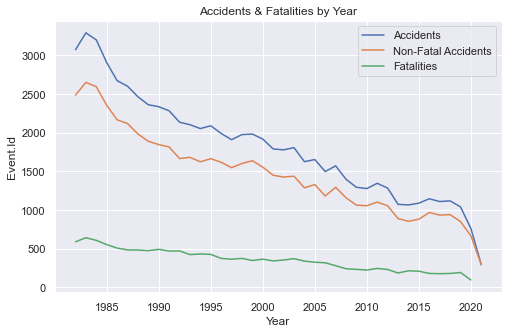

In [54]:
f, axes = plt.subplots(1, 1, figsize = (8,5))

axes.set_title("Accidents & Fatalities by Year", fontsize=12)
sb.lineplot( x = "Year", y = "Event.Id", data = df_accidents_per_year)
sb.lineplot( x = "Year", y = "Event.Id", data = df_nonfatal_per_year)
sb.lineplot( x = "Year", y = "Event.Id", data = df_fatal_per_year)
axes.legend(["Accidents", "Non-Fatal Accidents", "Fatalities"])

#### A clear downtrend can be observed, this can be explained by (please fill in brian)
#### 2021 has a sudden drop, maybe missing/incomplete data?

### Month, Day, Weekend Analysis for Accidents

In [55]:
#Pull data from df2 in terms of fatal, non fatal and total injuries and group by month and day
df_fatal_per_month= df2[df2["Injury.Severity"] == "Fatal"].groupby(["Month"], as_index = False)["Event.Id"].count()
df_nonfatal_per_month= df2[df2["Injury.Severity"] != "Fatal"].groupby(["Month"], as_index = False)["Event.Id"].count()
df_accidents_per_month= df2.groupby(["Month"], as_index = False)["Event.Id"].count()

df_fatal_per_day= df2[df2["Injury.Severity"] == "Fatal"].groupby(["Day"], as_index = False)["Event.Id"].count()
df_nonfatal_per_day= df2[df2["Injury.Severity"] != "Fatal"].groupby(["Day"], as_index = False)["Event.Id"].count()
df_accidents_per_day= df2.groupby(["Day"], as_index = False)["Event.Id"].count()

#Sort the df by month Jan - Dec
month_dict = {'Jan':1,'Feb':2,'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df_fatal_per_month = df_fatal_per_month.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
df_nonfatal_per_month = df_nonfatal_per_month.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))
df_accidents_per_month = df_accidents_per_month.sort_values('Month', key = lambda x : x.apply (lambda x : month_dict[x]))

#Sort the df by day Mon - Sun
day_dict = {'Mon':1,'Tue':2,'Wed':3, 'Thu':4, 'Fri':5, 'Sat':6, 'Sun':7}
df_fatal_per_day = df_fatal_per_day.sort_values('Day', key = lambda x : x.apply (lambda x : day_dict[x]))
df_nonfatal_per_day = df_nonfatal_per_day.sort_values('Day', key = lambda x : x.apply (lambda x : day_dict[x]))
df_accidents_per_day = df_accidents_per_day.sort_values('Day', key = lambda x : x.apply (lambda x : day_dict[x]))

### Plotting of Month, Day, Weekend Accidents, Fatal-Accidents, Non-Fatal Accidents

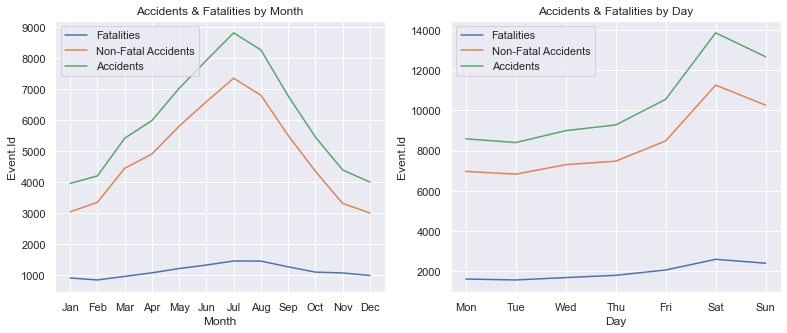

In [56]:
#Display line plot of the Accidents & Fatalities by Month and Day
f, axes = plt.subplots(1, 2, figsize = (13,5))

month = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
day =  ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

axes[0].set_title("Accidents & Fatalities by Month", fontsize=12)
sb.lineplot( x = "Month", y = "Event.Id", data = df_fatal_per_month, sort = False, ax = axes[0])
sb.lineplot( x = "Month", y = "Event.Id", data = df_nonfatal_per_month, sort = False, ax = axes[0])
sb.lineplot( x = "Month", y = "Event.Id", data = df_accidents_per_month, sort = False, ax = axes[0])
axes[0].legend(["Fatalities", "Non-Fatal Accidents", "Accidents"])  

axes[1].set_title("Accidents & Fatalities by Day", fontsize=12)
sb.lineplot( x = "Day", y = "Event.Id", data = df_fatal_per_day, ax = axes[1])
sb.lineplot( x = "Day", y = "Event.Id", data = df_nonfatal_per_day, sort = False, ax = axes[1])
sb.lineplot( x = "Day", y = "Event.Id", data = df_accidents_per_day, ax = axes[1])
axes[1].legend(["Fatalities", "Non-Fatal Accidents", "Accidents"])  

#### There seems to be a clear peak during the period of June, July, August.
#### There is a peak in Accidents on Saturdays and Sundays.

### Plot Trendline and Mean Line for Continuous Time Graph

Yearly decrease of fatality rate: 0.09279%
Mean fatality rate: 19.01278%


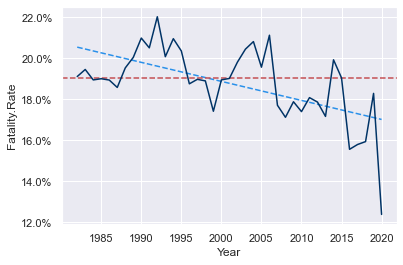

In [57]:
#Create dataframe for fatality rate per year
df_fatalityrate_per_year = pd.DataFrame()
df_fatalityrate_per_year["Fatality.Rate"] = df_fatal_per_year ["Event.Id"] / df_accidents_per_year["Event.Id"]
df_fatalityrate_per_year["Year"] = df_fatal_per_year["Year"]
df_fatalityrate_per_year.dropna(inplace = True)

#Create trendline
trendline = np.polyfit(df_fatalityrate_per_year["Year"], df_fatalityrate_per_year["Fatality.Rate"], 1)
print("Yearly decrease of fatality rate: " + str( - round(trendline[0] *100, 5)) + "%")
p = np.poly1d(trendline)
plt.plot(df_fatalityrate_per_year['Year'], p(df_fatalityrate_per_year['Year']), "--", color = '#2990EA')

#Create line with average fatality
averagefatal = len(df2[df2['Injury.Severity'] == 'Fatal'].index) / len(df2.index)
print("Mean fatality rate: " + str(round(averagefatal * 100, 5)) + '%')
plt.axhline(y = averagefatal, color = 'r', linestyle = '--')

sb.lineplot(x = 'Year', y = 'Fatality.Rate', data = df_fatalityrate_per_year, color = '#003366')
from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

#### We can observe that Fatality Rate percentage is decreasing at 0.09279% yearly.
#### Mean Fatality Rate is at 19.01278%

## Exploratory Analysis on Broad.phase.of.flight

### Plot Countplot for Broad.phase.of.flight

<AxesSubplot:title={'center':'Top 10 Accidents & Fatalities by Purpose.of.flight'}, xlabel='Purpose.of.flight', ylabel='count'>

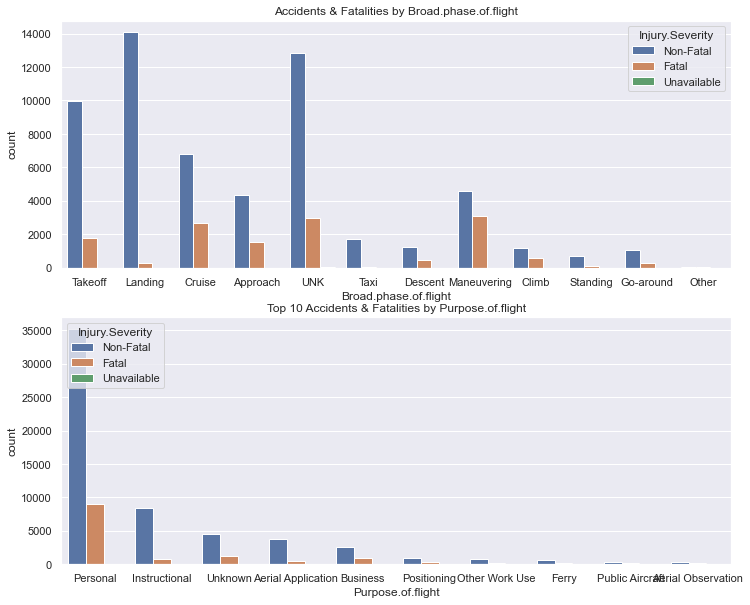

In [58]:
#Display catplot for the following
df_temp2 = df2.copy()
f, axes = plt.subplots(2, 1, figsize = (12,10))

axes[0].set_title("Accidents & Fatalities by Broad.phase.of.flight", fontsize=12)

sb.countplot(x= "Broad.phase.of.flight", hue = "Injury.Severity",data = df_temp2, ax = axes[0])

axes[1].set_title("Top 10 Accidents & Fatalities by Purpose.of.flight", fontsize=12)
sb.countplot(x= "Purpose.of.flight", hue = "Injury.Severity",data = df_temp2, order= df2["Purpose.of.flight"].value_counts().iloc[:10].index, ax = axes[1])

#### Unusually high Non-Fatal Accident ratio for Landing, High Fatal Accident ratio for Maneuvering. UNK will be ignored. 

### Plotting Countplot of Total.Fatal.Injuries, Total.Uninjured, Survival.Rate against Broad.phase.of.flight

[Text(0.5, 0, ''), Text(0, 0.5, 'Survival.Rate %')]

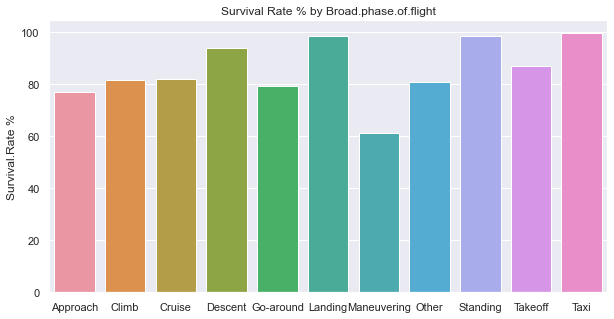

In [59]:
#Dwell more into Broad.phase.of.flight
df2_phase = df2.groupby("Broad.phase.of.flight").sum().reset_index()
df2_phase = df2_phase[df2_phase["Broad.phase.of.flight"] != "UNK"]

f, axes = plt.subplots(1, 1, figsize = (10,5))
axes.set_title("Survival Rate % by Broad.phase.of.flight", fontsize=12)
sb.barplot( y = 100*((df2_phase["Total.Uninjured"] + df2_phase["Total.Minor.Injuries"] + df2_phase["Total.Serious.Injuries"])/ (df2_phase["Total.Uninjured"] + df2_phase["Total.Fatal.Injuries"] + df2_phase["Total.Minor.Injuries"] + df2_phase["Total.Serious.Injuries"])), x = df2_phase["Broad.phase.of.flight"])
axes.set(xlabel = None, ylabel = "Survival.Rate %")

#### Maneuvering has the lowest Survival Rate out of all the Broad phases of flights.

### Plotting of Injury.Severity against Aircraft.Damage, Weather.Condition, Engine.Type, Number.of.Engines, Amateur.Built

[Text(0.5, 0, ''), Text(0, 0.5, '')]

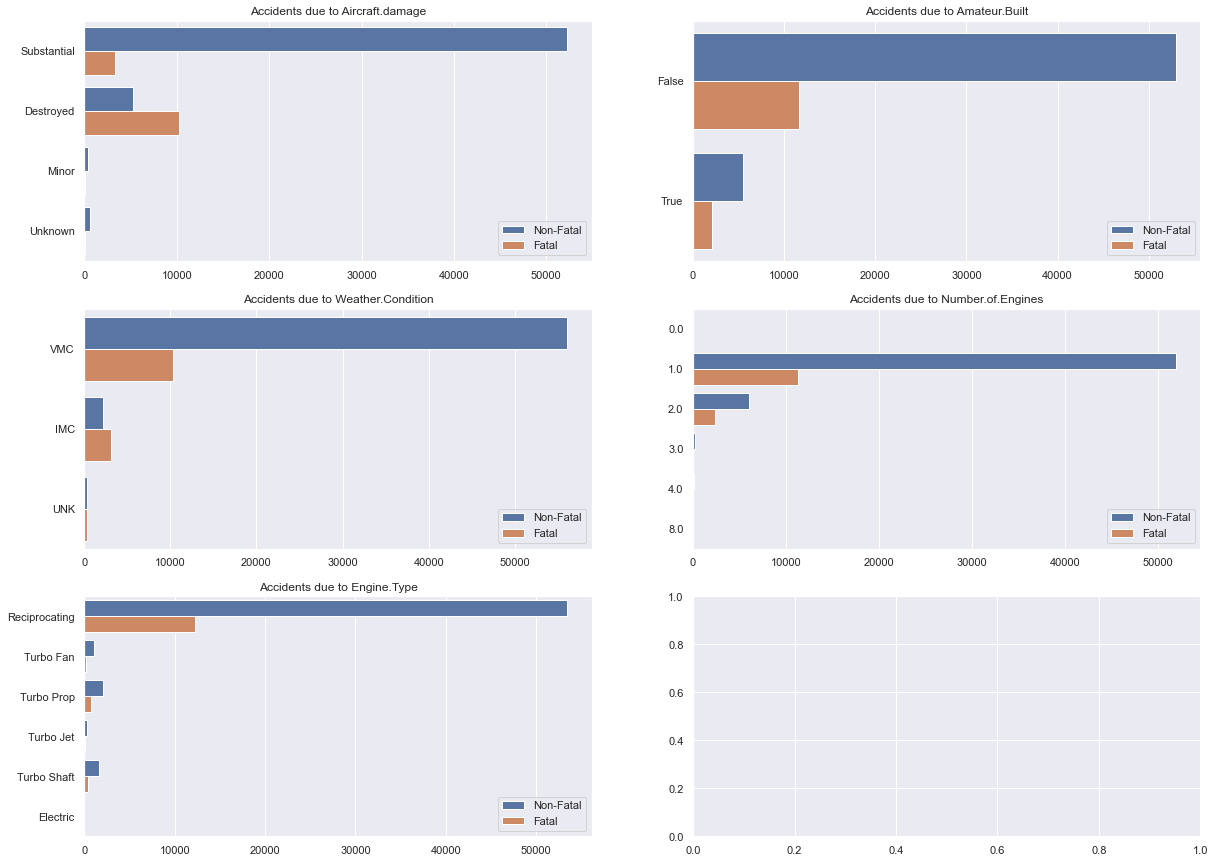

In [60]:
#Display catplot for the following
df2_used = df2[df2["Injury.Severity"] != "Unavailable"]

f, axes = plt.subplots(3, 2, figsize = (20,15))

#Due to Aircraft.damage
axes[0,0].set_title("Accidents due to Aircraft.damage", fontsize=12)
sb.countplot( y= df2_used["Aircraft.damage"], hue = df2_used["Injury.Severity"], ax = axes[0,0])
axes[0,0].legend(loc = "lower right")
axes[0,0].set(xlabel = None, ylabel = None)

#Due to Weather.Condition
axes[1,0].set_title("Accidents due to Weather.Condition", fontsize=12)
sb.countplot( y=df2_used["Weather.Condition"], hue = df2_used["Injury.Severity"], ax = axes[1,0])
axes[1,0].legend(loc = "lower right")
axes[1,0].set(xlabel = None, ylabel = None)

#Due to Engine.Type
axes[2,0].set_title("Accidents due to Engine.Type", fontsize=12)
sb.countplot(y=df2_used["Engine.Type"], hue = df2_used["Injury.Severity"], ax = axes[2,0])
axes[2,0].legend(loc = "lower right")
axes[2,0].set(xlabel = None, ylabel = None)

#Due to Number.of.Engines
axes[1,1].set_title("Accidents due to Number.of.Engines", fontsize=12)
sb.countplot(y=df2_used["Number.of.Engines"], hue = df2_used["Injury.Severity"], ax = axes[1,1])
axes[1,1].legend(loc = "lower right")
axes[1,1].set(xlabel = None, ylabel = None)

#Due to Amateur.Built
axes[0,1].set_title("Accidents due to Amateur.Built", fontsize=12)
sb.countplot(y=df2_used["Amateur.Built"], hue = df2_used["Injury.Severity"], ax = axes[0,1])
axes[0,1].legend(loc = "lower right")
axes[0,1].set(xlabel = None, ylabel = None)

#### We observe that for Aircraft.damage, there is a higher chance for destroyed aircraft to result in Fatal Accidents (duh)
#### We observe that for Amateur.Built, there is a higher chance for True values to result in Fatal Accidents
#### We observe that for Weather.Condition, there is a higher chance for IMC to result in Fatal Accidents
#### We observe that for Number.of.Engines, there is a higher chance for 2 Engine to result in Fatal Accidents
#### We observe that for Engine.Type, there is not much difference.

## Exploratory Analysis on Make

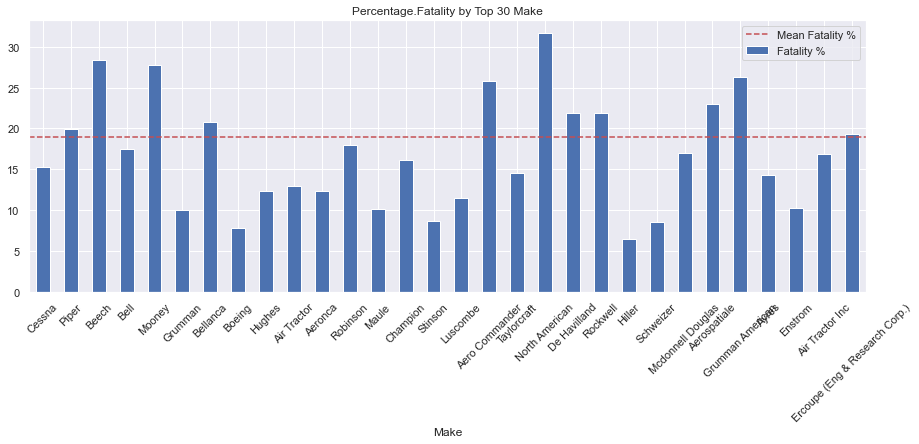

In [61]:
#Top 30 Make
df2_top30_Make = df2["Make"].value_counts().nlargest(30).index.tolist()
df2_make = df2[df2["Make"].isin(df2_top30_Make)]

#Calculate percentage of fatality by Make
df2_Make_percentagefatality = df2_make.groupby("Make")['Injury.Severity'].value_counts(normalize = True).unstack('Injury.Severity').reindex(df2_top30_Make)
df2_Make_percentagefatality["Fatal%"] = df2_Make_percentagefatality["Fatal"] * 100
df2_Make_percentagefatality = df2_Make_percentagefatality.reset_index()

#Plot bar and line plot
plott = df2_Make_percentagefatality.plot( kind = "bar", x = "Make", y = "Fatal%", figsize = (15,5))
plott.set_title("Percentage.Fatality by Top 30 Make", fontsize=12)
plott.tick_params(axis='x', rotation=45)
plott.axhline( y= averagefatal * 100, color = "r", linestyle = "--" )
plott.legend(["Mean Fatality %", "Fatality %"])

#### Certain Makes have above mean rate of being involved in a Fatal Accident.
#### e.g. Piper, Beech, Mooney, Bellenca, Aero Commander, North American, De Havilland, Rockwell, Aerospatiale, Grumman American, Ercoupe. 

### Plotting distribution of Make Accidents

[Text(0.5, 0, 'Make'), Text(0, 0.5, '')]

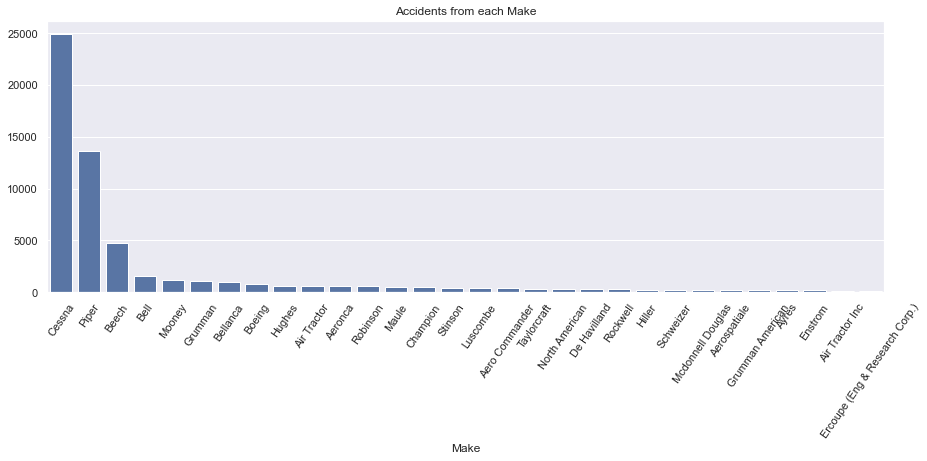

In [62]:
#Distribution of Make
df2_make2 = df2_make["Make"].value_counts(ascending=False).reset_index()

f, axes = plt.subplots(1, 1, figsize = (15,5))
axes.set_title("Accidents from each Make", fontsize=12)
sb.barplot( x = df2_make2["index"], y = df2_make2["Make"],  color = "b")
axes.tick_params(axis='x', rotation=55)
axes.set(xlabel = "Make", ylabel = None)

#### Cessna has the highest count of accidents, but can be explained by Cessna models being the most common aircraft models being flown.

## Exploratory Analysis on Model

In [63]:
#Df for top 15 Cessna
df2_cessna = df2[df2["Make"]=="Cessna"]
df2_top15_cessna = df2_cessna["Model"].value_counts().nlargest(15).index.tolist()
df2_top15_cessna = df2_cessna[df2_cessna["Model"].isin(df2_top15_cessna)]
#Sort from most count to least count
df2_top15_cessna = df2_top15_cessna.groupby(["Model"])["Event.Id"].count().reset_index(name = "Count").sort_values(["Count"], ascending = False)

#Df for top 15 Piper
df2_piper = df2[df2["Make"]=="Piper"]
df2_top15_piper = df2_piper["Model"].value_counts().nlargest(15).index.tolist()
df2_top15_piper = df2_piper[df2_piper["Model"].isin(df2_top15_piper)]
#Sort from most count to least count
df2_top15_piper = df2_top15_piper.groupby(["Model"])["Event.Id"].count().reset_index(name = "Count").sort_values(["Count"], ascending = False)

#Df for top 15 Beech
df2_beech = df2[df2["Make"]=="Beech"]
df2_top15_beech = df2_beech["Model"].value_counts().nlargest(15).index.tolist()
df2_top15_beech = df2_beech[df2_beech["Model"].isin(df2_top15_beech)]
#Sort from most count to least count
df2_top15_beech = df2_top15_beech.groupby(["Model"])["Event.Id"].count().reset_index(name = "Count").sort_values(["Count"], ascending = False)

#Df for top 15 Bell
df2_bell = df2[df2["Make"]=="Bell"]
df2_top15_bell = df2_bell["Model"].value_counts().nlargest(15).index.tolist()
df2_top15_bell = df2_bell[df2_bell["Model"].isin(df2_top15_bell)]
#Sort from most count to least count
df2_top15_bell = df2_top15_bell.groupby(["Model"])["Event.Id"].count().reset_index(name = "Count").sort_values(["Count"], ascending = False)


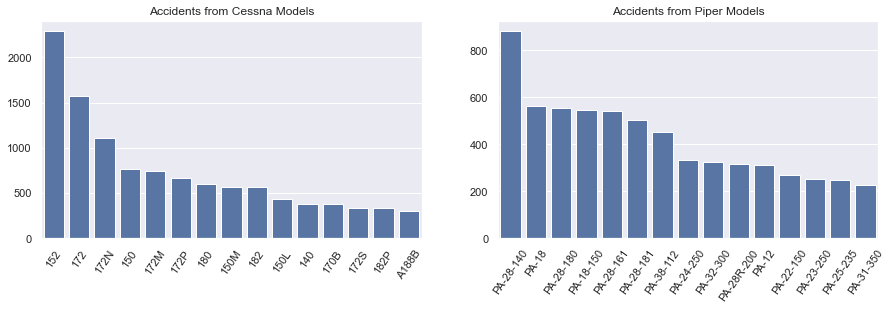

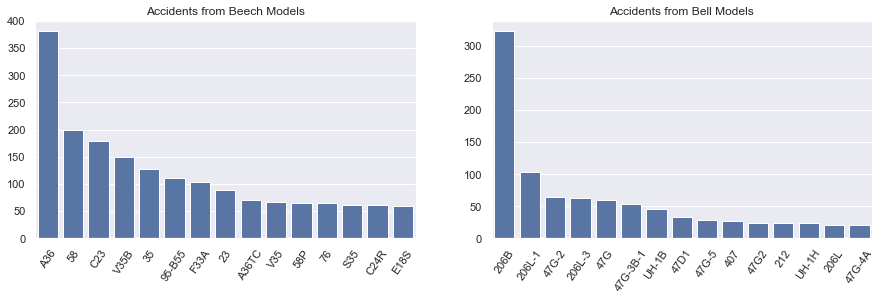

In [64]:
#Dwell deeper into Cessna, Piper, Beech, Bell
f, axes = plt.subplots(1, 2, figsize = (15,4))

axes[0].set_title("Accidents from Cessna Models", fontsize=12)
sb.barplot(x = df2_top15_cessna["Model"], y = df2_top15_cessna["Count"], color = "b", ax = axes[0])
axes[0].set(xlabel = None, ylabel = None)
axes[0].tick_params(axis='x', rotation=55)

axes[1].set_title("Accidents from Piper Models", fontsize=12)
sb.barplot(x = df2_top15_piper["Model"], y = df2_top15_piper["Count"], color = "b", ax = axes[1])
axes[1].set(xlabel = None, ylabel = None)
axes[1].tick_params(axis='x', rotation=55)

f, axes = plt.subplots(1, 2, figsize = (15,4))

axes[0].set_title("Accidents from Beech Models", fontsize=12)
sb.barplot(x = df2_top15_beech["Model"], y = df2_top15_beech["Count"], color = "b", ax = axes[0])
axes[0].set(xlabel = None, ylabel = None)
axes[0].tick_params(axis='x', rotation=55)

axes[1].set_title("Accidents from Bell Models", fontsize=12)
sb.barplot(x = df2_top15_bell["Model"], y = df2_top15_bell["Count"], color = "b", ax = axes[1])
axes[1].set(xlabel = None, ylabel = None)
axes[1].tick_params(axis='x', rotation=55)

#### Certain models are clearly inclined to accidents, but can be explained by these models being the most common in circulation.

In [65]:
# Survival Rate of each Make
cessna =pd.DataFrame(df2[df2['Make'].str.contains("Cessna")==True])
piper =pd.DataFrame(df2[df2['Make'].str.contains("Piper")==True])
beech =pd.DataFrame(df2[df2['Make'].str.contains("Beech")==True])
bell =pd.DataFrame(df2[df2['Make'].str.contains("Bell")==True])

print("Cessna Survival Rate: \t" , round((cessna["Survival.Rate"].sum()/cessna["Survival.Rate"].count()),4),"%")
print("Piper Survival Rate: \t" , round((piper["Survival.Rate"].sum()/piper["Survival.Rate"].count()),4),"%")
print("Beech Survival Rate: \t" , round((beech["Survival.Rate"].sum()/beech["Survival.Rate"].count()),4),"%")
print("Bell Survival Rate: \t" , round((bell["Survival.Rate"].sum()/bell["Survival.Rate"].count()),4),"%")

Cessna Survival Rate: 	 86.2402 %
Piper Survival Rate: 	 81.836 %
Beech Survival Rate: 	 73.5569 %
Bell Survival Rate: 	 83.7767 %


#### Despite being the make with the most amount of aircraft accidents, Cessna has the highest Surival Rate compared to makes like Piper, Beech and Bell.

## Exploratory Analysis on State and City

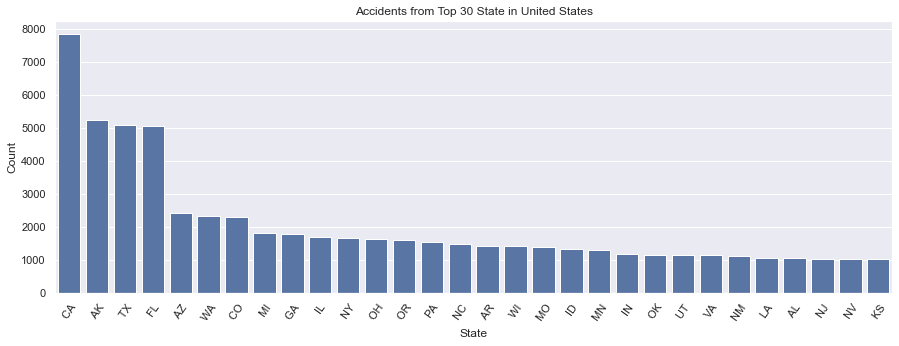

In [66]:
#Dwell deeper into United States
#Top 30 States in United States

df2_US = df2.copy()
df2_top30_US = df2["State"].value_counts().nlargest(30).index.tolist()
df2_US = df2[df2["State"].isin(df2_top30_US)]
#Sort from most count to least count
df2_US = df2_US.groupby(["State"])["Event.Id"].count().reset_index(name = "Count").sort_values(["Count"], ascending = False)

f, axes = plt.subplots(1, 1, figsize = (15,5))

axes.set_title("Accidents from Top 30 State in United States", fontsize=12)
sb.barplot(x = df2_US["State"], y = df2_US["Count"], color = "b")
axes.tick_params(axis='x', rotation=55)

#### California seems to have the most amount of accidents out of all the states.
#### However, Arkansas despite being a smaller state is at second place!
#### Beating Texas that has more than 10x its population.

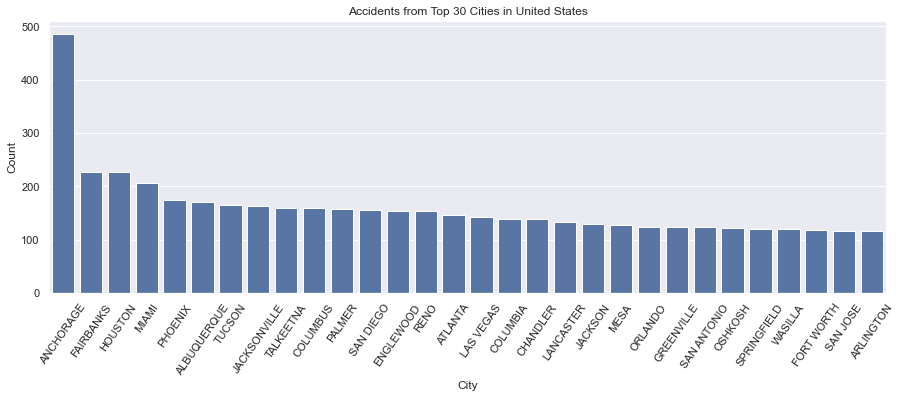

In [67]:
#Dwell deeper into United States
#Top 30 Locations in United States

df2_top30_US = df2["City"].value_counts().nlargest(30).index.tolist()
df2_US = df2[df2["City"].isin(df2_top30_US)]
#Sort from most count to least count
df2_US = df2_US.groupby(["City"])["Event.Id"].count().reset_index(name = "Count").sort_values(["Count"], ascending = False)

f, axes = plt.subplots(1, 1, figsize = (15,5))

axes.set_title("Accidents from Top 30 Cities in United States", fontsize=12)
sb.barplot(x = df2_US["City"], y = df2_US["Count"], color = "b")
axes.tick_params(axis='x', rotation=55)

#### The city of Anchorage, AK has an alarmingly high number of accidents! This explains the reason for Arkansas being the state with the second highest accidents despite having a smaller population than Texas.

# Problem Statement

## 1) Are flights getting safer?

## 2) How can we detect and predict potential fatal aircraft accidents earlier?

## Problem 1

### Based on the analysis conducted, we have chosen Year as predictor.

### Response Column will be Total Accidents and Total Fatal Accidents

## Problem 2

### Based on the analysis conducted, we have chosen 6 columns for predictors: 
#### Amateur.Built
#### Number.of.Engines
#### Engine.Type
#### Weather.Condition
#### Broad.phase.of.flight
#### Purpose.of.flight

### Reponse Columns will be Injury.Severity



# Machine Learning (Problem 1)

### Predicting next ten years of Accidents/Fatal Accidents

In [68]:
# Creating Dataframe with Year and Total Accidents
year_list = pd.DataFrame(year_df['Year'].value_counts().reset_index())
year_list.rename(columns={"Year": 'Accidents', "index": 'Year'}, inplace=True)

#Creating Dataframe with Year and Total Fatal Accidents
fatal_year_list = pd.DataFrame(year_df[year_df['Injury.Severity'] == True]['Year'].value_counts().reset_index())
fatal_year_list.rename(columns={"Year": 'Fatal Accidents', "index": 'Year'}, inplace=True)

next_ten = [x for x in range(2022,2033)]

# Remove 2022 because it has incomplete data for accidents
year_list = year_list[:-1]

### Training Linear Regression Model for Yearly Number of Accidents

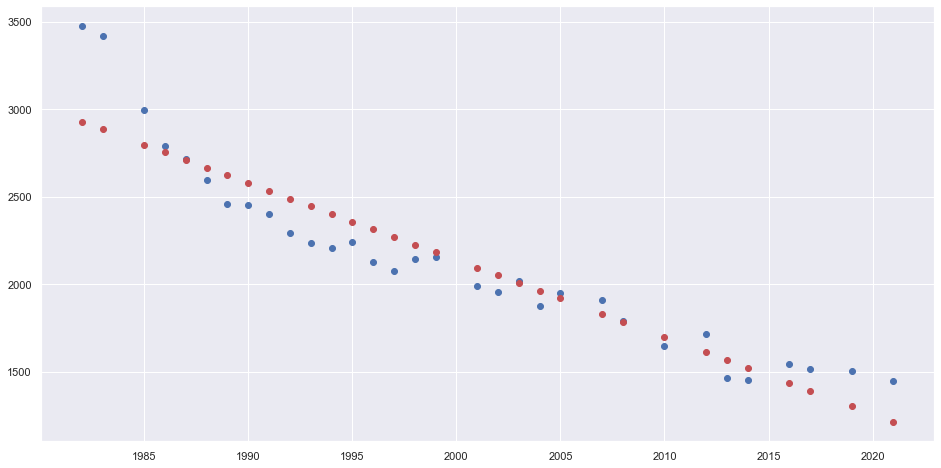

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8757342836105253
Mean Squared Error (MSE) 	: 34062.028454187675


In [69]:
x = pd.DataFrame(year_list["Year"])

y = pd.DataFrame(year_list['Accidents'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

linreg = LinearRegression()

linreg.fit(x_train, y_train)

# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_train_pred, color = "r")
plt.show()

# Check the Goodness of Fit
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

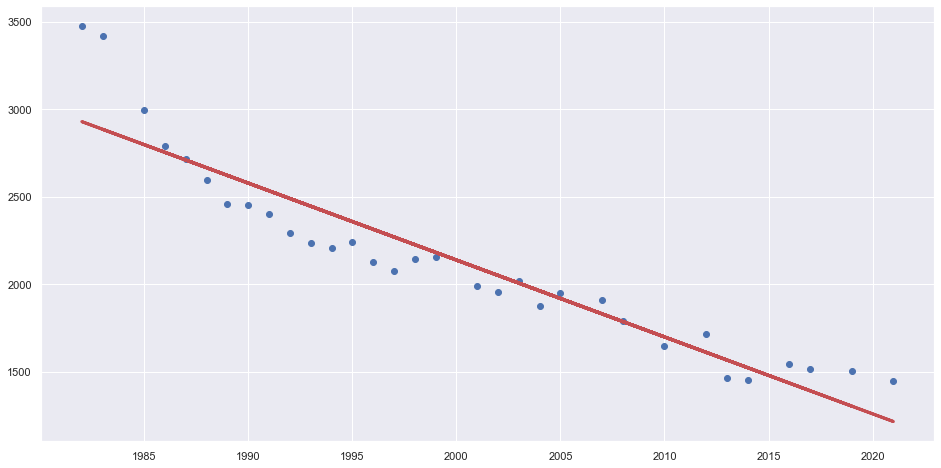

In [70]:
regline_x = x_train
regline_y = linreg.intercept_ + linreg.coef_ * x_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
plt.plot(regline_x.squeeze(), regline_y.squeeze(), 'r-', linewidth = 3)
plt.show()

In [71]:
accident_yearly_dict = {"Accidents": []}

for var in next_ten:
    accident_yearly_dict['Accidents'].append(linreg.predict([[var]])[0][0])

accident_yearly_df = pd.DataFrame(accident_yearly_dict, index=next_ten)
accident_yearly_df

,Accidents
2022,1170.793446
2023,1126.843503
2024,1082.893560
2025,1038.943617
2026,994.993674
2027,951.043731
2028,907.093788
2029,863.143845
2030,819.193902
2031,775.243959


#### Predicted number of accidents are on a downtrend!

### Training Linear Regression Model for Yearly Number of Fatal Accidents

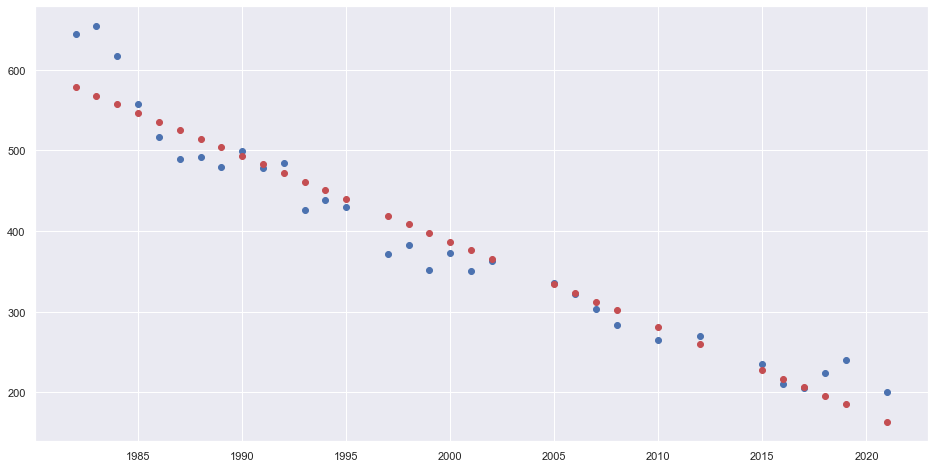

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9396678307601656
Mean Squared Error (MSE) 	: 998.339912747016


In [72]:
x = pd.DataFrame(fatal_year_list["Year"])

y = pd.DataFrame(fatal_year_list['Fatal Accidents'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

linreg = LinearRegression()

linreg.fit(x_train, y_train)

# Predict the Total values from Predictors
y_train_pred = linreg.predict(x_train)
y_test_pred = linreg.predict(x_test)

# Plot the Predictions vs the True values
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
plt.scatter(x_train, y_train_pred, color = "r")
plt.show()

# Check the Goodness of Fit
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

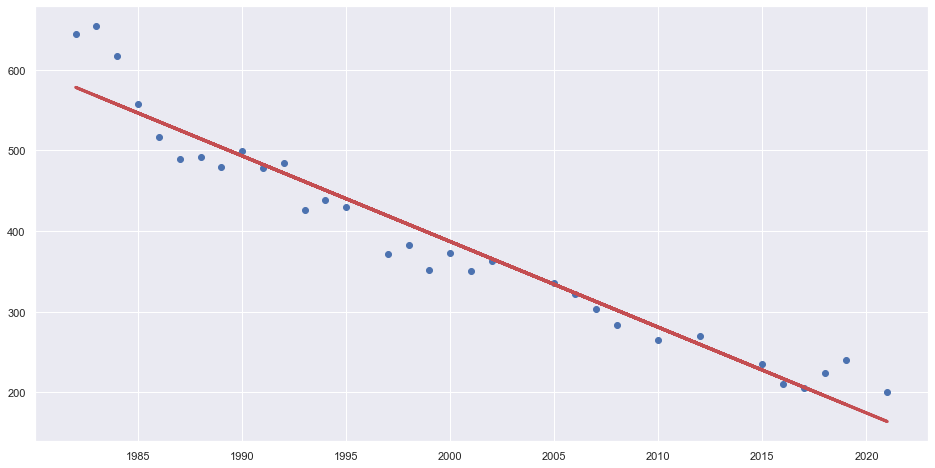

In [73]:
regline_x = x_train
regline_y = linreg.intercept_ + linreg.coef_ * x_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train)
plt.plot(regline_x.squeeze(), regline_y.squeeze(), 'r-', linewidth = 3)
plt.show()

In [74]:
accident_fatal_yearly_dict = {"Fatal Accidents": []}

for var in next_ten:
    accident_fatal_yearly_dict['Fatal Accidents'].append(linreg.predict([[var]])[0][0])

accident_fatal_yearly_dict
accident_fatal_yearly_df = pd.DataFrame(accident_fatal_yearly_dict, index=next_ten)
(accident_fatal_yearly_df.head(10))

,Fatal Accidents
2022,153.246917
2023,142.623529
2024,132.000142
2025,121.376754
2026,110.753367
2027,100.129979
2028,89.506592
2029,78.883204
2030,68.259817
2031,57.636429


#### Similarly, total fatal accidents predicted are on a downtrend!

### Rate of yearly decrease

In [75]:
yearly_rate_decrease = {}

for count, var in enumerate(accident_yearly_dict["Accidents"]):
    
    x = accident_fatal_yearly_dict['Fatal Accidents'][count]/var * 100
    
    if count == 9:
        
        yearly_rate_decrease[2022+count] = [x]
        break
        
    z = accident_fatal_yearly_dict['Fatal Accidents'][count+1] - accident_fatal_yearly_dict['Fatal Accidents'][count]
    y = accident_yearly_dict['Accidents'][count+1] - var
    yearly_rate_decrease[2022+count] = [x, y, z]
    
for count, var in enumerate(yearly_rate_decrease):
    
    print(f'{(var)} Fatality Rate: {yearly_rate_decrease[var][0].round(2)}%')

2022 Fatality Rate: 13.09%
2023 Fatality Rate: 12.66%
2024 Fatality Rate: 12.19%
2025 Fatality Rate: 11.68%
2026 Fatality Rate: 11.13%
2027 Fatality Rate: 10.53%
2028 Fatality Rate: 9.87%
2029 Fatality Rate: 9.14%
2030 Fatality Rate: 8.33%
2031 Fatality Rate: 7.43%


#### There is a clear downtrend of fatal accidents over total accidents for the next ten years.

# Machine Learning (Problem 2)

In [76]:
def convert_dict(df, predictor):
    
    """takes categorical values within a dataframe and converts into ordinal scale, 
        returning a dictionary with new ordinal values"""
    
    temp_dict = {}

    for count, var in enumerate(df[predictor].unique()):
    
        if predictor == "Number.of.Engines":
        
            continue
        
        temp_dict[var] = count
    
    return temp_dict

In [77]:
def average_classAcc(ML_model, ensemble_usDF, predictors_list):
    
    """gets the average classification accuracy for given machine 
        learning model and ensemble-undersampled datasets"""
    
    response = "Injury.Severity"
    
    if ML_model == "Logistic":
        
        acc_list = []
        
        for dataframe in ensemble_usDF:

            y = pd.DataFrame(dataframe[response])
            x = pd.DataFrame(dataframe[predictors_list])
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
            
            logreg = LogisticRegression()
            logreg.fit(x_train, y_train)
    
            LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)
            
            y_pred = logreg.predict(x_test)
            
            acc_list.append(logreg.score(x_test, y_test) * 100)
            
        return acc_list, mean(acc_list)

    elif ML_model == "Forest":
        
        acc_list = []

        for dataframe in ensemble_usDF:

            y = pd.DataFrame(dataframe[response])
            x = pd.DataFrame(dataframe[predictors_list])
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

            dectree = RandomForestClassifier()
            dectree.fit(x_train, y_train)

            y_pred = dectree.predict(x_test)

            acc_list.append(dectree.score(x_test, y_test) * 100)

        return acc_list, mean(acc_list)   
    
    
    else:
        
        acc_list = []

        for dataframe in ensemble_usDF:

            y = pd.DataFrame(dataframe[response])
            x = pd.DataFrame(dataframe[predictors_list])
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

            dectree = DecisionTreeClassifier()
            dectree.fit(x_train, y_train)

            y_pred = dectree.predict(x_test)

            acc_list.append(dectree.score(x_test, y_test) * 100)

        return acc_list, mean(acc_list)   
        

In [78]:
def average_recallAcc(ML_model, ensemble_usDF, predictors_list):
    
    """gets the average recall accuracy for given machine 
        learning model and ensemble-undersampled datasets"""
    
    response = "Injury.Severity"
    
    if ML_model == "Logistic":
        
        acc_list = []
        
        for dataframe in ensemble_usDF:

            y = pd.DataFrame(dataframe[response])
            x = pd.DataFrame(dataframe[predictors_list])
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
            
            logreg = LogisticRegression()
            logreg.fit(x_train, y_train)
    
            LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)
            
            y_pred = logreg.predict(x_test)
            y_test_pred = logreg.predict(x_test)
            
            acc_list.append(classification_report(y_test,y_test_pred, output_dict=True)['Fatal']['recall'] * 100)
            
        return acc_list, mean(acc_list)
    
    elif ML_model == "Forest":
        
        acc_list = []

        for dataframe in ensemble_usDF:

            y = pd.DataFrame(dataframe[response])
            x = pd.DataFrame(dataframe[predictors_list])
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

            dectree = RandomForestClassifier()
            dectree.fit(x_train, y_train)

            y_pred = dectree.predict(x_test)
            y_test_pred = dectree.predict(x_test)
            
            acc_list.append(classification_report(y_test,y_test_pred, output_dict=True)['Fatal']['recall'] * 100)

        return acc_list, mean(acc_list)   
    
    else:
        
        acc_list = []

        for dataframe in ensemble_usDF:

            y = pd.DataFrame(dataframe[response])
            x = pd.DataFrame(dataframe[predictors_list])
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

            dectree = DecisionTreeClassifier()
            dectree.fit(x_train, y_train)

            y_pred = dectree.predict(x_test)
            y_test_pred = dectree.predict(x_test)
            
            acc_list.append(classification_report(y_test,y_test_pred, output_dict=True)['Fatal']['recall'] * 100)

        return acc_list, mean(acc_list)   

### Further preparation of dataset for Problem 2

In [79]:
dectree_df = df2[(df2["Injury.Severity"] == "Non-Fatal") | (df2["Injury.Severity"] == "Fatal")]

response = ["Injury.Severity"]
predictors = ["Amateur.Built", "Number.of.Engines", "Engine.Type", "Weather.Condition", "Broad.phase.of.flight", "Purpose.of.flight"]
keep_columns = predictors + response

dectree_df = dectree_df[keep_columns].reset_index().drop("index", axis=1)
dectree_df

,Amateur.Built,Number.of.Engines,Engine.Type,Weather.Condition,Broad.phase.of.flight,Purpose.of.flight,Injury.Severity
0,False,1.0,Reciprocating,VMC,Takeoff,Personal,Non-Fatal
1,False,2.0,Reciprocating,IMC,Landing,Business,Non-Fatal
2,False,1.0,Reciprocating,IMC,Cruise,Personal,Non-Fatal
3,False,1.0,Reciprocating,VMC,Approach,Personal,Non-Fatal
4,False,1.0,Reciprocating,VMC,Landing,Personal,Non-Fatal
...,...,...,...,...,...,...,...
72278,False,1.0,Reciprocating,VMC,UNK,Business,Non-Fatal
72279,False,1.0,Reciprocating,VMC,UNK,Personal,Non-Fatal
72280,False,1.0,Reciprocating,VMC,UNK,Instructional,Non-Fatal
72281,False,1.0,Reciprocating,VMC,UNK,Instructional,Non-Fatal


In [80]:
dectree_df = dectree_df[dectree_df["Amateur.Built"].notnull() == True]
dectree_df = dectree_df[dectree_df["Number.of.Engines"].notnull() == True] #For Number.of.Engines = 0, i didn't remove
dectree_df = dectree_df[dectree_df["Engine.Type"].notnull() == True]       #For Engine.Type = None, i didn't remove 
dectree_df = dectree_df[dectree_df["Weather.Condition"].notnull() == True]
dectree_df = dectree_df[dectree_df["Broad.phase.of.flight"].notnull() == True]
dectree_df = dectree_df[dectree_df["Weather.Condition"] != "UNK"]
dectree_df = dectree_df[dectree_df["Broad.phase.of.flight"] != "UNK"]
dectree_df = dectree_df[(dectree_df["Broad.phase.of.flight"] != "Other")]
dectree_df = dectree_df[(dectree_df["Purpose.of.flight"] != "Unknown")]
for var in predictors:
    
    print(var,":", dectree_df[var].isnull().sum())
    print(dectree_df[var].value_counts())
    print()

Amateur.Built : 0
False    45952
True      4965
Name: Amateur.Built, dtype: int64

Number.of.Engines : 0
1.0    46220
2.0     4640
4.0       37
3.0       20
Name: Number.of.Engines, dtype: int64

Engine.Type : 0
Reciprocating    47854
Turbo Shaft       1468
Turbo Prop        1212
Turbo Fan          210
Turbo Jet          173
Name: Engine.Type, dtype: int64

Weather.Condition : 0
VMC    47273
IMC     3644
Name: Weather.Condition, dtype: int64

Broad.phase.of.flight : 0
Landing        13387
Takeoff        10653
Cruise          8403
Maneuvering     6975
Approach        5296
Climb           1543
Descent         1407
Taxi            1381
Go-around       1268
Standing         604
Name: Broad.phase.of.flight, dtype: int64

Purpose.of.flight : 0
Personal                     33161
Instructional                 7187
Aerial Application            3540
Business                      3097
Positioning                   1015
Other Work Use                 780
Ferry                          589
Public 

### Change predictor columns to ordinal scale, except Number.of.Engines 

In [81]:
mapping_values = []

for count, var in enumerate(predictors):
    
    if var == "Number.of.Engines":
        continue
        
    temporary_dict = convert_dict(dectree_df, var)
    mapping_values.append(temporary_dict)
    dectree_df[var] = dectree_df[var].map(temporary_dict)

### Alternate Dataset with Response changed to Boolean: Non-Fatal, False; Fatal, True

In [82]:
dectree_df_tf = dectree_df.copy()
dectree_df_tf['Injury.Severity'].replace('Non-Fatal', False, inplace=True)
dectree_df_tf['Injury.Severity'].replace('Fatal', True, inplace=True)

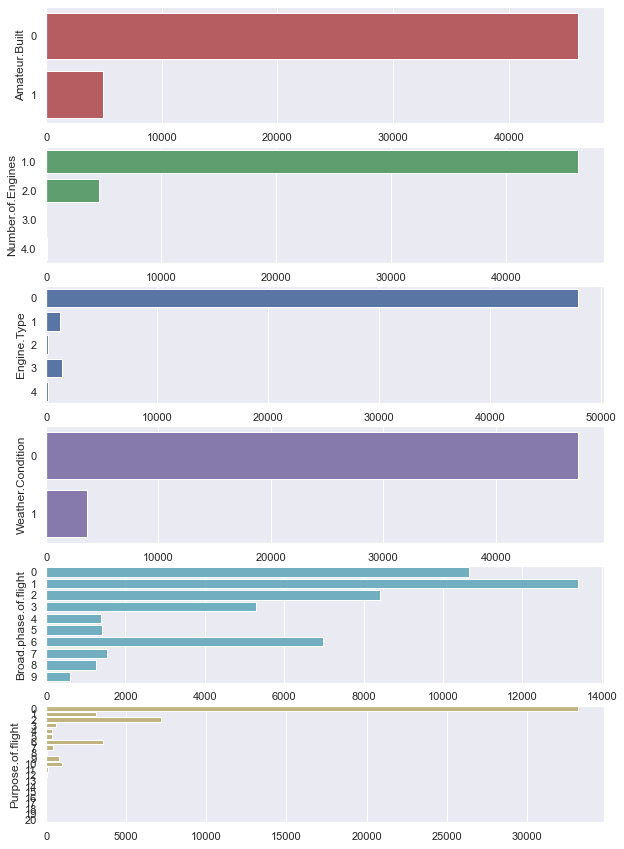

In [83]:
predictor_data = pd.DataFrame(dectree_df[["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"]])

# Draw the distributions of all variables
f, axes = plt.subplots(6, 1, figsize=(10, 15))
colors = ["r", "g", "b", "m", "c", "y"]

count = 0
for var in predictor_data:
    sb.countplot(y = predictor_data[var], orient = "h", color = colors[count],  ax = axes[count])
    axes[count].set(xlabel = None)
    count += 1

In [84]:
dectree_df['Injury.Severity'].value_counts()

Non-Fatal    41532
Fatal         9385
Name: Injury.Severity, dtype: int64

### Ensemble Undersampling of data
#### Due to our response variables being unbalanced (9385 Fatal vs 41532 Non-Fatal), this leads to machine learning methods being skewed, leading to models being inefficient at actually predicting recall well.

In [85]:
# Shuffling Non-Fatal data first, before splitting evenly into four different datasets
# that are then joined with Fatal Data, creating an ensemble of four datasets.
temp_linreg_ser1 = dectree_df[(dectree_df["Injury.Severity"] == "Non-Fatal")]
shuffled = pd.DataFrame(temp_linreg_ser1).sample(frac=1)
result = np.array_split(shuffled, 4)

for count, dataframe in enumerate(result):
    result[count] = dataframe.append(dectree_df[(dectree_df["Injury.Severity"] == "Fatal")])
    
temp_linreg_test = result[0]
result[0][['Injury.Severity']]

,Injury.Severity
40004,Non-Fatal
19286,Non-Fatal
34681,Non-Fatal
9391,Non-Fatal
12728,Non-Fatal
...,...
56989,Fatal
57002,Fatal
57003,Fatal
57020,Fatal


In [86]:
result[1]['Injury.Severity'].value_counts()

Non-Fatal    10383
Fatal         9385
Name: Injury.Severity, dtype: int64

#### After doing this, we are left with four equally divided datasets of 19768 rows each, with 9385 Fatal, and 10383 Non-Fatal.

## Decision Tree Model (DTM)
#### Now using DTM, predict bi-variate for all predictors against response, and a final multi-variate model.
#### We split all our test/train datasets in a 2:8 ratio.

### DTM Amateur.Built

Accuracy of Decision Tree classifier on test set: 53.89%
              precision    recall  f1-score   support

       Fatal       0.58      0.14      0.22      1892
   Non-Fatal       0.53      0.91      0.67      2062

    accuracy                           0.54      3954
   macro avg       0.56      0.52      0.45      3954
weighted avg       0.55      0.54      0.46      3954



<AxesSubplot:>

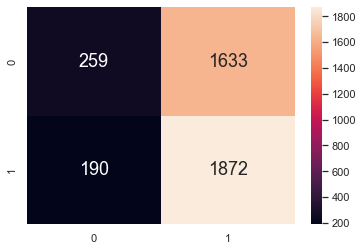

In [87]:
# Amateur.Built
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Amateur.Built'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [88]:
classavg_list, avg_classacc = average_classAcc('', result, ['Amateur.Built'])

print("Amateur.Built \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Amateur.Built 	Classification Accuracy
Accuracy 1: 		 54.88
Accuracy 2: 		 54.3
Accuracy 3: 		 55.06
Accuracy 4: 		 54.78
Avg Accuracy: 		 54.75


In [89]:
classavg_list, avg_classacc = average_recallAcc('', result, ['Amateur.Built'])

print("Amateur.Built \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Amateur.Built 	Recall Accuracy
Accuracy 1: 		 15.202156334231805
Accuracy 2: 		 14.316239316239315
Accuracy 3: 		 15.306122448979592
Accuracy 4: 		 13.959660297239914
Avg Accuracy: 		 14.696044599172657


#### Amateur.Built performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### DTM Number.of.Engines

Accuracy of Decision Tree classifier on test set: 55.26%
              precision    recall  f1-score   support

       Fatal       0.66      0.15      0.25      1908
   Non-Fatal       0.54      0.92      0.68      2046

    accuracy                           0.55      3954
   macro avg       0.60      0.54      0.47      3954
weighted avg       0.60      0.55      0.47      3954



<AxesSubplot:>

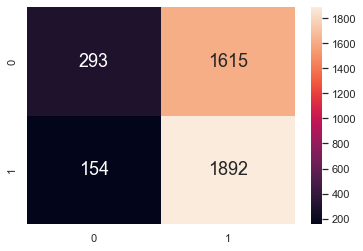

In [90]:
# Number.of.Engines
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Number.of.Engines'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [91]:
classavg_list, avg_classacc = average_classAcc('', result, ['Number.of.Engines'])

print("Number.of.Engines \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Number.of.Engines 	Classification Accuracy
Accuracy 1: 		 55.54
Accuracy 2: 		 55.97
Accuracy 3: 		 54.63
Accuracy 4: 		 56.25
Avg Accuracy: 		 55.6


In [92]:
classavg_list, avg_classacc = average_recallAcc('', result, ['Number.of.Engines'])

print("Number.of.Engines \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Number.of.Engines 	Recall Accuracy
Accuracy 1: 		 15.899122807017543
Accuracy 2: 		 16.793066088840735
Accuracy 3: 		 15.911542610571736
Accuracy 4: 		 15.159718462371414
Avg Accuracy: 		 15.940862492200356


#### Number.of.Engines performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### DTM Engine.Type

Accuracy of Decision Tree classifier on test set: 54.81%
              precision    recall  f1-score   support

       Fatal       0.60      0.08      0.14      1835
   Non-Fatal       0.54      0.95      0.69      2119

    accuracy                           0.55      3954
   macro avg       0.57      0.52      0.42      3954
weighted avg       0.57      0.55      0.44      3954



<AxesSubplot:>

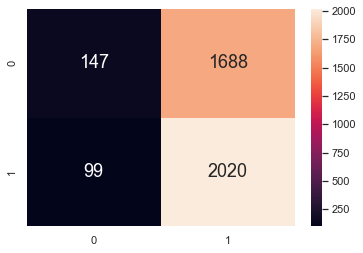

In [93]:
# Engine.Type
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Engine.Type'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [94]:
classavg_list, avg_classacc = average_classAcc('', result, ['Engine.Type'])

print("Engine.Type \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Engine.Type 	Classification Accuracy
Accuracy 1: 		 52.53
Accuracy 2: 		 53.06
Accuracy 3: 		 52.58
Accuracy 4: 		 54.02
Avg Accuracy: 		 53.05


In [95]:
classavg_list, avg_classacc = average_recallAcc('', result, ['Engine.Type'])

print("Engine.Type \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Engine.Type 	Recall Accuracy
Accuracy 1: 		 8.098028769312734
Accuracy 2: 		 5.689747718733226
Accuracy 3: 		 8.667736757624397
Accuracy 4: 		 5.603448275862069
Avg Accuracy: 		 7.014740380383106


#### Engine.Type performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### DTM Weather.Condition

Accuracy of Decision Tree classifier on test set: 61.94%
              precision    recall  f1-score   support

       Fatal       0.88      0.24      0.38      1908
   Non-Fatal       0.58      0.97      0.73      2046

    accuracy                           0.62      3954
   macro avg       0.73      0.61      0.55      3954
weighted avg       0.73      0.62      0.56      3954



<AxesSubplot:>

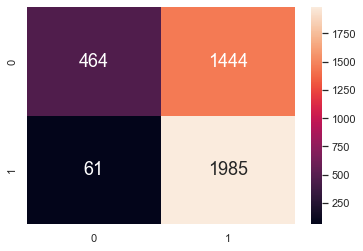

In [96]:
# Weather.Condition
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Weather.Condition'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [97]:
classavg_list, avg_classacc = average_classAcc('', result, ['Weather.Condition'])

print("Weather.Condition \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Weather.Condition 	Classification Accuracy
Accuracy 1: 		 61.96
Accuracy 2: 		 62.42
Accuracy 3: 		 63.76
Accuracy 4: 		 63.58
Avg Accuracy: 		 62.93


In [98]:
classavg_list, avg_classacc = average_recallAcc('', result, ['Weather.Condition'])

print("Weather.Condition \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Weather.Condition 	Recall Accuracy
Accuracy 1: 		 23.114754098360656
Accuracy 2: 		 24.972972972972972
Accuracy 3: 		 23.510114816839803
Accuracy 4: 		 22.89156626506024
Avg Accuracy: 		 23.622352038308417


#### Weather.Condition performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value despite good classification accuracy.

### DTM Broad.phase.of.flight

Accuracy of Decision Tree classifier on test set: 68.94%
              precision    recall  f1-score   support

       Fatal       0.63      0.81      0.71      1831
   Non-Fatal       0.78      0.59      0.67      2123

    accuracy                           0.69      3954
   macro avg       0.70      0.70      0.69      3954
weighted avg       0.71      0.69      0.69      3954



<AxesSubplot:>

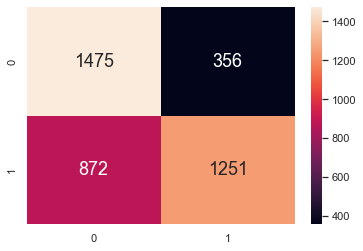

In [99]:
# Broad.phase.of.flight
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Broad.phase.of.flight'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [100]:
classavg_list, avg_classacc = average_classAcc('', result, ['Broad.phase.of.flight'])

print("Broad.phase.of.flight \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Broad.phase.of.flight 	Classification Accuracy
Accuracy 1: 		 68.97
Accuracy 2: 		 67.7
Accuracy 3: 		 68.64
Accuracy 4: 		 67.3
Avg Accuracy: 		 68.15


In [101]:
classavg_list, avg_classacc = average_recallAcc('', result, ['Broad.phase.of.flight'])

print("Broad.phase.of.flight \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Broad.phase.of.flight 	Recall Accuracy
Accuracy 1: 		 77.20042417815482
Accuracy 2: 		 76.71816728822589
Accuracy 3: 		 77.43616466909849
Accuracy 4: 		 76.48
Avg Accuracy: 		 76.9586890338698


#### We have a winner! Ding Ding Ding! Amazing recall accuracy, good at predicting true crashes, and having an acceptable classification accuracy, acceptable f1 scores across the board too.

### DTM Purpose.of.flight

Accuracy of Decision Tree classifier on test set: 54.48%
              precision    recall  f1-score   support

       Fatal       0.57      0.17      0.26      1877
   Non-Fatal       0.54      0.89      0.67      2077

    accuracy                           0.54      3954
   macro avg       0.56      0.53      0.46      3954
weighted avg       0.55      0.54      0.48      3954



<AxesSubplot:>

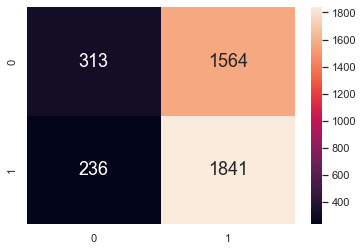

In [102]:
# Purpose.of.flight
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Purpose.of.flight'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [103]:
classavg_list, avg_classacc = average_classAcc('', result, ['Purpose.of.flight'])

print("Purpose.of.flight \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Purpose.of.flight 	Classification Accuracy
Accuracy 1: 		 54.81
Accuracy 2: 		 54.38
Accuracy 3: 		 53.44
Accuracy 4: 		 53.41
Avg Accuracy: 		 54.01


In [104]:
classavg_list, avg_classacc = average_recallAcc('', result, ['Purpose.of.flight'])

print("Purpose.of.flight \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Purpose.of.flight 	Recall Accuracy
Accuracy 1: 		 89.83050847457628
Accuracy 2: 		 86.62009672219237
Accuracy 3: 		 85.97260273972603
Accuracy 4: 		 16.16640337019484
Avg Accuracy: 		 69.64740282667238


#### This predictor is a wild card, it has high recall scores, but this fluctuates from ~15% to high ~80%, also has mediocre classification accuracies. Might be a good predictor of true crashes, if it were not for the inconsistency. (Try the above cell multiple times, you will understand after.)

### DTM Multi-Variate

Accuracy of Decision Tree classifier on test set: 73.60%
              precision    recall  f1-score   support

       Fatal       0.74      0.69      0.71      1876
   Non-Fatal       0.73      0.78      0.76      2078

    accuracy                           0.74      3954
   macro avg       0.74      0.73      0.73      3954
weighted avg       0.74      0.74      0.74      3954



<AxesSubplot:>

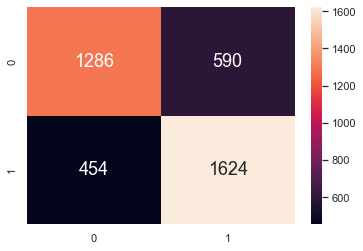

In [105]:
# Multi-variate
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"]])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = DecisionTreeClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of Decision Tree classifier on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [106]:
classavg_list, avg_classacc = average_classAcc('', result, ["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"])

print("Multi-variate \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Multi-variate 	Classification Accuracy
Accuracy 1: 		 73.39
Accuracy 2: 		 74.13
Accuracy 3: 		 74.48
Accuracy 4: 		 72.28
Avg Accuracy: 		 73.57


In [107]:
classavg_list, avg_classacc = average_recallAcc('', result, ["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"])

print("Multi-Variate \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Multi-Variate 	Recall Accuracy
Accuracy 1: 		 67.53246753246754
Accuracy 2: 		 65.04494976203067
Accuracy 3: 		 67.55037115588547
Accuracy 4: 		 65.4353562005277
Avg Accuracy: 		 66.39078616272785


#### Multi-variate model has the highest classification accuracy out of all the decision tree models, but it is lacking when it comes to recall accuracy as compared to Broad.phase.of.flight, still can be considered an acceptable model for predicting true crashes. (Maybe the best model?)

### Decision Tree Conclusion

#### We observe that predictors: Amateur.Built, Number.of.Engines, Engine.Type and Weather.Condition are terrible at predicting true fatal accidents due to their low recall scores. 
#### However, we see that Broad.phase.of.flight and Purpose.of.flight have very high recall scores, which means they are great at predicting true fatal accidents.
#### And finally, for our multi-variate model that uses all the predictors, it has the highest classification accuracy and an acceptable recall score.
#### Overall, we can say that certain bi-variate DTM combinations are good models, but most of them are terrible. The multi-variate model outperforms most bi-variate models.

## Logistic Regression Model (LRM)
#### Now using LRM, predict bi-variate for all predictors against response, and a final multi-variate model.
#### We split all our test/train datasets in a 2:8 ratio.

### LRM Amateur.Built

Accuracy of logistic regression classifier on test set: 54.10%

              precision    recall  f1-score   support

       Fatal       0.61      0.14      0.23      1908
   Non-Fatal       0.53      0.92      0.67      2046

    accuracy                           0.54      3954
   macro avg       0.57      0.53      0.45      3954
weighted avg       0.57      0.54      0.46      3954



<AxesSubplot:>

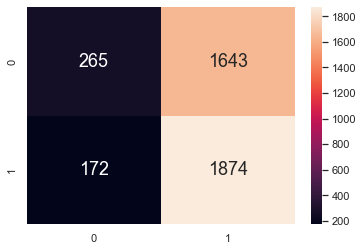

In [108]:
# For Amateur.Built
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Amateur.Built"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [109]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ['Amateur.Built'])

print("Amateur.Built \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Amateur.Built 	Classification Accuracy
Accuracy 1: 		 55.08
Accuracy 2: 		 55.72
Accuracy 3: 		 54.93
Accuracy 4: 		 54.93
Avg Accuracy: 		 55.17


In [110]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ['Amateur.Built'])

print("Amateur.Built \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Amateur.Built 	Recall Accuracy
Accuracy 1: 		 15.636555731642895
Accuracy 2: 		 15.054887611082071
Accuracy 3: 		 14.135021097046414
Accuracy 4: 		 14.146341463414632
Avg Accuracy: 		 14.743201475796504


#### Amateur.Built performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### LRM Number.of.Engines

Accuracy of logistic regression classifier on test set: 56.30%

              precision    recall  f1-score   support

       Fatal       0.65      0.16      0.26      1866
   Non-Fatal       0.55      0.92      0.69      2088

    accuracy                           0.56      3954
   macro avg       0.60      0.54      0.47      3954
weighted avg       0.60      0.56      0.49      3954



<AxesSubplot:>

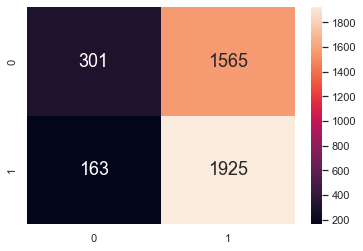

In [111]:
# For Number.of.Engines
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Number.of.Engines"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [112]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ['Number.of.Engines'])

print("Number.of.Engines \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Number.of.Engines 	Classification Accuracy
Accuracy 1: 		 56.35
Accuracy 2: 		 54.68
Accuracy 3: 		 54.55
Accuracy 4: 		 57.56
Avg Accuracy: 		 55.79


In [113]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ['Number.of.Engines'])

print("Number.of.Engines \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Number.of.Engines 	Recall Accuracy
Accuracy 1: 		 14.008394543546695
Accuracy 2: 		 16.053333333333335
Accuracy 3: 		 15.7752566180443
Accuracy 4: 		 15.397260273972602
Avg Accuracy: 		 15.308561192224232


#### Number.of.Engines performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value, despite slightly above average classification accuracy.

### LRM Engine.Type

Accuracy of logistic regression classifier on test set: 55.59%

              precision    recall  f1-score   support

       Fatal       0.62      0.09      0.16      1823
   Non-Fatal       0.55      0.95      0.70      2131

    accuracy                           0.56      3954
   macro avg       0.59      0.52      0.43      3954
weighted avg       0.58      0.56      0.45      3954



<AxesSubplot:>

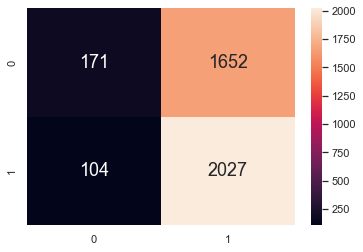

In [114]:
# For Engine.Type
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Engine.Type"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [115]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ['Engine.Type'])

print("Engine.Type \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Engine.Type 	Classification Accuracy
Accuracy 1: 		 54.1
Accuracy 2: 		 54.17
Accuracy 3: 		 53.82
Accuracy 4: 		 50.96
Avg Accuracy: 		 53.26


In [116]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ['Engine.Type'])

print("Engine.Type \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Engine.Type 	Recall Accuracy
Accuracy 1: 		 4.505437597099949
Accuracy 2: 		 4.911180773249739
Accuracy 3: 		 8.068854222700377
Accuracy 4: 		 4.555198285101822
Avg Accuracy: 		 5.5101677195379715


#### Engine.Type performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### LRM Weather.Condition

Accuracy of logistic regression classifier on test set: 62.90%

              precision    recall  f1-score   support

       Fatal       0.87      0.24      0.38      1843
   Non-Fatal       0.59      0.97      0.74      2111

    accuracy                           0.63      3954
   macro avg       0.73      0.60      0.56      3954
weighted avg       0.72      0.63      0.57      3954



<AxesSubplot:>

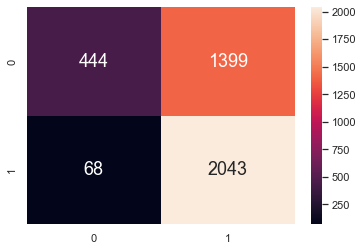

In [117]:
# For Weather.Condition
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Weather.Condition"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [118]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ['Weather.Condition'])

print("Weather.Condition \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Weather.Condition 	Classification Accuracy
Accuracy 1: 		 62.85
Accuracy 2: 		 64.24
Accuracy 3: 		 60.72
Accuracy 4: 		 61.76
Avg Accuracy: 		 62.39


In [119]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ['Weather.Condition'])

print("Weather.Condition \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Weather.Condition 	Recall Accuracy
Accuracy 1: 		 25.119999999999997
Accuracy 2: 		 24.677419354838708
Accuracy 3: 		 24.592833876221498
Accuracy 4: 		 25.13171759747102
Avg Accuracy: 		 24.880492707132806


#### Weather.Condition performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value, despite having an above average classification accuracy.

### LRM Broad.phase.of.flight

Accuracy of logistic regression classifier on test set: 61.20%

              precision    recall  f1-score   support

       Fatal       0.64      0.43      0.51      1879
   Non-Fatal       0.60      0.78      0.68      2075

    accuracy                           0.61      3954
   macro avg       0.62      0.60      0.59      3954
weighted avg       0.62      0.61      0.60      3954



<AxesSubplot:>

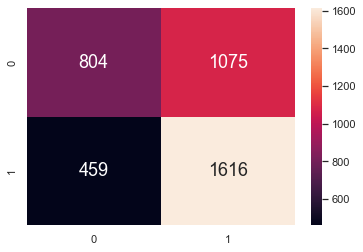

In [120]:
# For Broad.phase.of.flight
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Broad.phase.of.flight"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [121]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ['Broad.phase.of.flight'])

print("Broad.phase.of.flight \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Broad.phase.of.flight 	Classification Accuracy
Accuracy 1: 		 61.1
Accuracy 2: 		 59.46
Accuracy 3: 		 61.33
Accuracy 4: 		 61.08
Avg Accuracy: 		 60.74


In [122]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ['Broad.phase.of.flight'])

print("Broad.phase.of.flight \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Broad.phase.of.flight 	Recall Accuracy
Accuracy 1: 		 42.0824295010846
Accuracy 2: 		 42.638522427440634
Accuracy 3: 		 40.21276595744681
Accuracy 4: 		 42.29957805907173
Avg Accuracy: 		 41.808323986260945


#### Broad.phase.of.flight performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value, despite having an above average classification accuracy. 
#### Curiously, DTM resulted in a better ML model for recall accuracy compared to LRM.

### LRM Purpose.of.flight

Accuracy of logistic regression classifier on test set: 52.88%

              precision    recall  f1-score   support

       Fatal       0.00      0.00      0.00      1863
   Non-Fatal       0.53      1.00      0.69      2091

    accuracy                           0.53      3954
   macro avg       0.26      0.50      0.35      3954
weighted avg       0.28      0.53      0.37      3954



<AxesSubplot:>

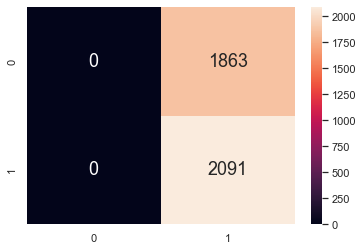

In [123]:
# For Purpose.of.flight
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Purpose.of.flight"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [124]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ['Purpose.of.flight'])

print("Purpose.of.flight \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Purpose.of.flight 	Classification Accuracy
Accuracy 1: 		 52.73
Accuracy 2: 		 53.06
Accuracy 3: 		 52.55
Accuracy 4: 		 53.14
Avg Accuracy: 		 52.87


In [125]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ['Purpose.of.flight'])

print("Purpose.of.flight \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Purpose.of.flight 	Recall Accuracy
Accuracy 1: 		 0.0
Accuracy 2: 		 0.0
Accuracy 3: 		 0.0
Accuracy 4: 		 0.0
Avg Accuracy: 		 0.0


#### Terrible Model, 0% recall accuracy, not useful in predicting true fatal accidents at all!
#### See confusion matrix, assumes that all predictions will be Non-Fatal.

### LRM Multi-Variate

Accuracy of logistic regression classifier on test set: 70.33%

              precision    recall  f1-score   support

       Fatal       0.72      0.63      0.67      1913
   Non-Fatal       0.69      0.77      0.73      2041

    accuracy                           0.70      3954
   macro avg       0.71      0.70      0.70      3954
weighted avg       0.70      0.70      0.70      3954



<AxesSubplot:>

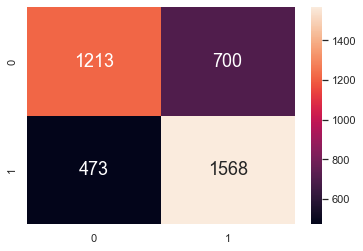

In [126]:
# For multivariate
# Extract Response and Predictors
y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", 'Purpose.of.flight']])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight = None, dual = False, fit_intercept = True, intercept_scaling = 1, multi_class = "ovr", n_jobs = 1)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(logreg.score(X_test, y_test)*100))
print()
print(classification_report(y_test, y_pred))
sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [127]:
classavg_list, avg_classacc = average_classAcc('Logistic', result, ["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", 'Purpose.of.flight'])

print("Multi-Variate \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Multi-Variate 	Classification Accuracy
Accuracy 1: 		 69.2
Accuracy 2: 		 70.64
Accuracy 3: 		 70.31
Accuracy 4: 		 70.23
Avg Accuracy: 		 70.09


In [128]:
classavg_list, avg_classacc = average_recallAcc('Logistic', result, ["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", 'Purpose.of.flight'])

print("Multi-Variate \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Multi-Variate 	Recall Accuracy
Accuracy 1: 		 62.844780962682535
Accuracy 2: 		 62.12765957446808
Accuracy 3: 		 60.10752688172043
Accuracy 4: 		 60.815217391304344
Avg Accuracy: 		 61.47379620254385


#### Somehow, despite the overall poor recall scores that was obtained during bi-variate comparison, the multi-variate model manages to perform at an above average level for both classification accuracy and recall accuracy, making it useful to an extent for predicting true fatal accidents.
#### In addition, removing certain predictors actually makes the model perform better! e.g. Purpose.of.flight

### LRM Conclusion

#### We observe that when using LRM to predict fatal accidents, all the predictors when used in bi-variate, performed terribly with poor recall accuracies, and average classification accuracies, Purpose.of.flight even returned 0% recall accuracy.
#### However, after fitting the predictors in a multi-variate LRM, the model was able to provide useable results with above average classification accuracies and recall accuracies.

## Random Forest Classifier Model (RFCM)
#### Now using RFCM, predict bi-variate for all predictors against response, and a final multi-variate model.
#### We split all our test/train datasets in a 2:8 ratio.

### RFCM Amateur.Built

Accuracy of RFCM on test set: 54.07%
              precision    recall  f1-score   support

       Fatal       0.60      0.14      0.23      1911
   Non-Fatal       0.53      0.91      0.67      2043

    accuracy                           0.54      3954
   macro avg       0.57      0.53      0.45      3954
weighted avg       0.57      0.54      0.46      3954



<AxesSubplot:>

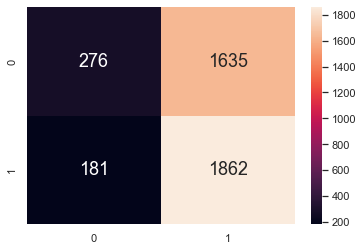

In [129]:
# Amateur.Built

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Amateur.Built'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [130]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ['Amateur.Built'])

print("Amateur.Built \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Amateur.Built 	Classification Accuracy
Accuracy 1: 		 54.86
Accuracy 2: 		 55.67
Accuracy 3: 		 53.52
Accuracy 4: 		 54.53
Avg Accuracy: 		 54.64


In [131]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ["Amateur.Built"])

print("Amateur.Built \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Amateur.Built 	Recall Accuracy
Accuracy 1: 		 13.791295228106975
Accuracy 2: 		 14.644351464435147
Accuracy 3: 		 13.74803972817564
Accuracy 4: 		 14.262820512820513
Avg Accuracy: 		 14.111626733384568


####  Amateur.Built performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### RFCM Number.of.Engines

Accuracy of RFCM on test set: 57.08%
              precision    recall  f1-score   support

       Fatal       0.66      0.17      0.26      1845
   Non-Fatal       0.56      0.93      0.70      2109

    accuracy                           0.57      3954
   macro avg       0.61      0.55      0.48      3954
weighted avg       0.61      0.57      0.50      3954



<AxesSubplot:>

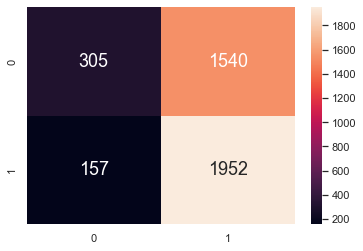

In [132]:
# Number.of.Engines

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Number.of.Engines'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [133]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ["Number.of.Engines"])

print("Number.of.Engines \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Number.of.Engines 	Classification Accuracy
Accuracy 1: 		 55.18
Accuracy 2: 		 57.11
Accuracy 3: 		 55.67
Accuracy 4: 		 56.42
Avg Accuracy: 		 56.1


In [134]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ['Number.of.Engines'])

print("Number.of.Engines \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Number.of.Engines 	Recall Accuracy
Accuracy 1: 		 16.08884073672806
Accuracy 2: 		 14.731182795698924
Accuracy 3: 		 14.300960512273212
Accuracy 4: 		 16.0427807486631
Avg Accuracy: 		 15.290941198340825


####  Number.of.Engines performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### RFCM Engine.Type

Accuracy of RFCM on test set: 53.14%
              precision    recall  f1-score   support

       Fatal       0.60      0.08      0.15      1907
   Non-Fatal       0.53      0.95      0.68      2047

    accuracy                           0.53      3954
   macro avg       0.56      0.52      0.41      3954
weighted avg       0.56      0.53      0.42      3954



<AxesSubplot:>

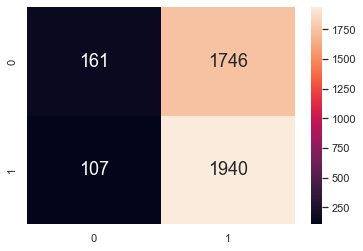

In [135]:
# Engine.Type

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Engine.Type'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [136]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ["Engine.Type"])

print("Engine.Type \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Engine.Type 	Classification Accuracy
Accuracy 1: 		 53.59
Accuracy 2: 		 53.29
Accuracy 3: 		 52.76
Accuracy 4: 		 54.4
Avg Accuracy: 		 53.51


In [137]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ['Engine.Type'])

print("Engine.Type \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Engine.Type 	Recall Accuracy
Accuracy 1: 		 7.4113287453679195
Accuracy 2: 		 7.048921620199895
Accuracy 3: 		 5.2887209929843495
Accuracy 4: 		 4.699738903394255
Avg Accuracy: 		 6.112177565486605


####  Number.of.Engines performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value.

### RFCM Weather.Condition

Accuracy of RFCM on test set: 61.94%
              precision    recall  f1-score   support

       Fatal       0.88      0.23      0.37      1886
   Non-Fatal       0.58      0.97      0.73      2068

    accuracy                           0.62      3954
   macro avg       0.73      0.60      0.55      3954
weighted avg       0.72      0.62      0.56      3954



<AxesSubplot:>

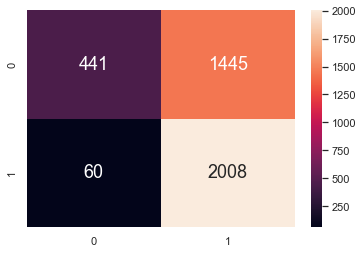

In [138]:
# Weather.Condition

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Weather.Condition'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [139]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ["Weather.Condition"])

print("Weather.Condition \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Weather.Condition 	Classification Accuracy
Accuracy 1: 		 63.51
Accuracy 2: 		 62.9
Accuracy 3: 		 62.54
Accuracy 4: 		 62.16
Avg Accuracy: 		 62.78


In [140]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ['Weather.Condition'])

print("Weather.Condition \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Weather.Condition 	Recall Accuracy
Accuracy 1: 		 24.524197933659597
Accuracy 2: 		 23.16234796404019
Accuracy 3: 		 23.809523809523807
Accuracy 4: 		 24.656810982048576
Avg Accuracy: 		 24.03822017231804


####  Number.of.Engines performs way worse at predicting air crashes than ratio (0.5) because of the poor recall value, despite above average classification accuracy.

### RFCM Broad.phase.of.flight

Accuracy of RFCM on test set: 67.68%
              precision    recall  f1-score   support

       Fatal       0.63      0.78      0.70      1869
   Non-Fatal       0.75      0.58      0.65      2085

    accuracy                           0.68      3954
   macro avg       0.69      0.68      0.68      3954
weighted avg       0.69      0.68      0.67      3954



<AxesSubplot:>

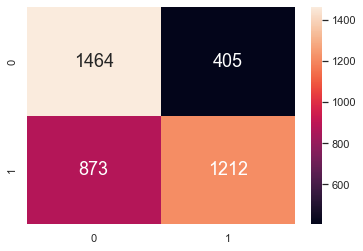

In [141]:
# Broad.phase.of.flight

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Broad.phase.of.flight'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [142]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ["Broad.phase.of.flight"])

print("Broad.phase.of.flight \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Broad.phase.of.flight 	Classification Accuracy
Accuracy 1: 		 68.89
Accuracy 2: 		 68.64
Accuracy 3: 		 66.82
Accuracy 4: 		 68.97
Avg Accuracy: 		 68.33


In [143]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ['Broad.phase.of.flight'])

print("Broad.phase.of.flight \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Broad.phase.of.flight 	Recall Accuracy
Accuracy 1: 		 76.29748528624933
Accuracy 2: 		 78.50368809272919
Accuracy 3: 		 77.44034707158352
Accuracy 4: 		 77.82515991471215
Avg Accuracy: 		 77.51667009131855


#### Broad.phase.of.flight has high recall accuracy, making it good for predicting true fatal accidents, while also having an acceptable classification accuracy, acceptable f1 scores are present as well.
#### This is a good model for predicting fatal accidents.

### RFCM Purpose.of.flight

Accuracy of RFCM on test set: 54.02%
              precision    recall  f1-score   support

       Fatal       0.60      0.17      0.27      1926
   Non-Fatal       0.53      0.89      0.66      2028

    accuracy                           0.54      3954
   macro avg       0.56      0.53      0.47      3954
weighted avg       0.56      0.54      0.47      3954



<AxesSubplot:>

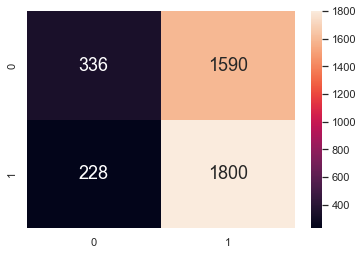

In [144]:
# Purpose.of.flight

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test['Purpose.of.flight'])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [145]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ["Purpose.of.flight"])

print("Purpose.of.flight \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Purpose.of.flight 	Classification Accuracy
Accuracy 1: 		 54.7
Accuracy 2: 		 54.65
Accuracy 3: 		 54.88
Accuracy 4: 		 53.79
Avg Accuracy: 		 54.51


In [146]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ['Purpose.of.flight'])

print("Purpose.of.flight \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Purpose.of.flight 	Recall Accuracy
Accuracy 1: 		 15.441176470588236
Accuracy 2: 		 87.13450292397661
Accuracy 3: 		 86.23265741728922
Accuracy 4: 		 87.10554951033733
Avg Accuracy: 		 68.97847158054785


#### Purpose.of.flight for RFCM has exeptionally high recall accuracy, but average classification accuracy.
#### Similar to the DTM, the results for recall tend to fluctuate as well, leading to inconsistent results over models.

### RFCM Multi-Variate

Accuracy of RFCM on test set: 72.81%
              precision    recall  f1-score   support

       Fatal       0.74      0.66      0.70      1897
   Non-Fatal       0.72      0.79      0.75      2057

    accuracy                           0.73      3954
   macro avg       0.73      0.73      0.73      3954
weighted avg       0.73      0.73      0.73      3954



<AxesSubplot:>

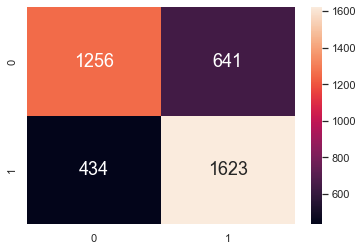

In [147]:
# Multi-variate

y = pd.DataFrame(temp_linreg_test["Injury.Severity"])
X = pd.DataFrame(temp_linreg_test[["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"]])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

dectree = RandomForestClassifier()

dectree.fit(x_train, y_train)

y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

print('Accuracy of RFCM on test set: {:.2f}%'.format(dectree.score(x_test, y_test)*100))

print(classification_report(y_test, y_test_pred))
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [148]:
classavg_list, avg_classacc = average_classAcc('Forest', result, ["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"])

print("Multi-Variate \tClassification Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x.round(2)}")
print(f"Avg Accuracy: \t\t {avg_classacc.round(2)}")

Multi-Variate 	Classification Accuracy
Accuracy 1: 		 72.13
Accuracy 2: 		 72.81
Accuracy 3: 		 73.04
Accuracy 4: 		 73.12
Avg Accuracy: 		 72.77


In [149]:
classavg_list, avg_classacc = average_recallAcc('Forest', result, ["Amateur.Built","Number.of.Engines","Engine.Type","Weather.Condition","Broad.phase.of.flight", "Purpose.of.flight"])

print("Multi-Variate \tRecall Accuracy")
for count, x in enumerate(classavg_list):
    print(f"Accuracy {count + 1}: \t\t {x}")
print(f"Avg Accuracy: \t\t {avg_classacc}")

Multi-Variate 	Recall Accuracy
Accuracy 1: 		 67.5475687103594
Accuracy 2: 		 64.58333333333334
Accuracy 3: 		 68.67088607594937
Accuracy 4: 		 67.28427739544732
Avg Accuracy: 		 67.02151637877236


#### Multi-Variate RFCM has the highest classification accuracy out of all the models, however, it is less effective at prediciting true fatal air crashes than Broad.phase.of.flight

#### Also, interestingly, removing Weather.Condition from the predictors actually increases recall accuracy by 10% at the expense of -3% for classification accuracy, but it is a good trade-off.

### RFCM Conclusion

#### With the exception of Broad.phase.of.flight and Purpose.of.flight, the other predictors return poor recall accuracies when performing bi-variate RFCM, and return average classification accuracies with some exceptions.
#### While Purpose.of.flight has the highest recall accuracy sometimes, the insconsistency of the model does not inspire much trust.
#### All things considered, Broad.phase.of.flight and Multi-Variate models are strong contenders for good ML models to predict fatal accidents.
#### However, when we remove "Weather.Condition" from Multi-Variate model, Multi-Variate outperforms Broad.phase.of.flight bi-variate with 2% better classification accuracy, while having similar recall accuracy values.

# Overall Conclusion and Findings

## 1. Are flights getting safer?
### Yes! From the Time Series Linear Regression, count of Accidents and Fatal Accidents are on a decrease and Fatality Rate is decreasing at a rate of 0.0699% / year. 

## 2. How can we early detect and predict potential fatal aircraft accidents?
### With Decision Tree method, we can indicate the Broad.phase.of.flight to predict the if an accident is Fatal with a recall of 77.49%. 

### With Broad.phase.of.flight being a dominating predictor for ONLY Fatal Accidents with high recall rates in multiple ML methods, pilots can be advised to take precaution when that specific phase is experienced in order to reduce risks of accidents.
